In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import datetime as dt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df=pd.read_csv("/content/employee_data.csv")
df1=pd.read_csv("/content/employee_engagement_survey_data.csv")
df2=pd.read_csv("/content/recruitment_data.csv")
df3=pd.read_csv("/content/training_and_development_data.csv")

In [3]:
pd.set_option('display.max_columns', None)
df.head()

EmpID FirstName LastName  StartDate ExitDate                    Title  \
0   3427     Uriah  Bridges  20-Sep-19      NaN  Production Technician I   
1   3428     Paula    Small  11-Feb-23      NaN  Production Technician I   
2   3429    Edward     Buck  10-Dec-18      NaN       Area Sales Manager   
3   3430   Michael  Riordan  21-Jun-21      NaN       Area Sales Manager   
4   3431   Jasmine    Onque  29-Jun-19      NaN       Area Sales Manager   

        Supervisor                        ADEmail BusinessUnit EmployeeStatus  \
0     Peter Oneill    uriah.bridges@bilearner.com         CCDR         Active   
1  Renee Mccormick      paula.small@bilearner.com           EW         Active   
2   Crystal Walker      edward.buck@bilearner.com           PL         Active   
3   Rebekah Wright  michael.riordan@bilearner.com         CCDR         Active   
4        Jason Kim    jasmine.onque@bilearner.com          TNS         Active   

  EmployeeType PayZone EmployeeClassificationType TerminationType  \
0     Contract  Zone C                  Temporary             Unk   
1     Contract  Zone A                  Part-Time             Unk   
2    Full-Time  Zone B                  Part-Time             Unk   
3     Contract  Zone A                  Full-Time             Unk   
4     Contract  Zone A                  Temporary             Unk   

  TerminationDescription     DepartmentType              Division         DOB  \
0                    NaN  Production         Finance & Accounting  07-10-1969   
1                    NaN  Production                       Aerial  30-08-1965   
2                    NaN              Sales         General - Sga  06-10-1991   
3                    NaN              Sales  Finance & Accounting  04-04-1998   
4                    NaN              Sales         General - Con  29-08-1969   

  State JobFunctionDescription GenderCode  LocationCode  RaceDesc MaritalDesc  \
0    MA             Accounting     Female         34904     White     Widowed   
1    MA                  Labor       Male          6593  Hispanic     Widowed   
2    MA              Assistant       Male          2330  Hispanic     Widowed   
3    ND                  Clerk       Male         58782     Other      Single   
4    FL                Laborer     Female         33174     Other     Married   

  Performance Score  Current Employee Rating  
0       Fully Meets                        4  
1       Fully Meets                        3  
2       Fully Meets                        4  
3       Fully Meets                        2  
4       Fully Meets                        3

In [4]:
df1.head()

Employee ID Survey Date  Engagement Score  Satisfaction Score  \
0         1001  10-10-2022                 2                   5   
1         1002  03-08-2023                 4                   5   
2         1003  03-01-2023                 2                   5   
3         1004  30-07-2023                 3                   5   
4         1005  19-06-2023                 2                   4   

   Work-Life Balance Score  
0                        5  
1                        3  
2                        2  
3                        3  
4                        5

In [5]:
df2.head()

Applicant ID Application Date   First Name Last Name  Gender Date of Birth  \
0          1001        03-Jun-23        Scott  Sheppard    Male    31-08-1992   
1          1002        15-May-23      Stanley     Lewis    Male    29-04-1965   
2          1003        04-Aug-23       Javier        Li  Female    10-03-1973   
3          1004        28-Jul-23  Christopher  Johnston   Other    04-04-2001   
4          1005        05-Jun-23      Melissa     Hicks   Other    17-06-1978   

           Phone Number                       Email  \
0    421-429-7655x39421      perezjanet@example.org   
1  +1-451-574-5308x1681       grossmark@example.com   
2         (858)901-5499  katiemaldonado@example.com   
3    (853)681-1839x2010        sheila73@example.com   
4    364-575-8478x67812  emilypatterson@example.org   

                         Address                City State  Zip Code  \
0                597 Smith Point         Hollandfort    NV     57588   
1               8116 Stuart Loop   Port Margaretfurt    TN     14726   
2   5940 Barr Villages Suite 075           Dianaland    TX      4699   
3                442 Lewis Mount           Youngfurt    GA     34455   
4  95961 Taylor Circles Apt. 169  East Ashleyborough    IN     21014   

           Country    Education Level  Years of Experience  Desired Salary  \
0       Micronesia        High School                    8        60103.21   
1        Greenland  Bachelor's Degree                   17        64575.84   
2            China                PhD                   20        39422.71   
3            Ghana        High School                    8        51045.11   
4  Solomon Islands    Master's Degree                    0        52792.86   

                                   Job Title        Status  
0                   Chief Technology Officer  Interviewing  
1                        Designer, furniture      Rejected  
2  Sound technician, broadcasting/film/video      Rejected  
3                             Air cabin crew      Rejected  
4                              Art therapist  Interviewing

In [6]:
df3.head()

Employee ID Training Date   Training Program Name Training Type  \
0         1001     21-Sep-22        Customer Service      Internal   
1         1002     19-Jul-23  Leadership Development      Internal   
2         1003     24-Feb-23        Technical Skills      Internal   
3         1004     12-Jan-23        Customer Service      Internal   
4         1005     12-May-23    Communication Skills      External   

  Training Outcome           Location            Trainer  \
0           Failed          Port Greg     Amanda Daniels   
1           Failed        Brandonview  Brittany Chambers   
2       Incomplete  Port Briannahaven      Mark Roberson   
3        Completed      Knightborough     Richard Fisher   
4           Passed         Bruceshire    Heather Shaffer   

   Training Duration(Days)  Training Cost  
0                        4         510.83  
1                        2         582.37  
2                        4         777.06  
3                        2         824.30  
4                        4         145.99

In [7]:
def data_description(dataframe):
    description = pd.DataFrame({'Columns':dataframe.columns,
                                'Dtype' : [dataframe[i].dtype for i in dataframe.columns],
                                'Nunique Values': [dataframe[i].nunique() for i in dataframe.columns],
                                'Null Values': [dataframe[i].isna().sum() for i in dataframe.columns]})
    return description

data_description(df1)

Columns   Dtype  Nunique Values  Null Values
0              Employee ID   int64            3000            0
1              Survey Date  object             366            0
2         Engagement Score   int64               5            0
3       Satisfaction Score   int64               5            0
4  Work-Life Balance Score   int64               5            0

In [8]:
df1.shape

(3000, 5)

In [9]:
data_description(df3)

Columns    Dtype  Nunique Values  Null Values
0              Employee ID    int64            3000            0
1            Training Date   object             366            0
2    Training Program Name   object               5            0
3            Training Type   object               2            0
4         Training Outcome   object               4            0
5                 Location   object            2738            0
6                  Trainer   object            2942            0
7  Training Duration(Days)    int64               5            0
8            Training Cost  float64            2965            0

In [10]:
gambung = pd.merge(df1,df3,on=['Employee ID'])
gambung.head()

Employee ID Survey Date  Engagement Score  Satisfaction Score  \
0         1001  10-10-2022                 2                   5   
1         1002  03-08-2023                 4                   5   
2         1003  03-01-2023                 2                   5   
3         1004  30-07-2023                 3                   5   
4         1005  19-06-2023                 2                   4   

   Work-Life Balance Score Training Date   Training Program Name  \
0                        5     21-Sep-22        Customer Service   
1                        3     19-Jul-23  Leadership Development   
2                        2     24-Feb-23        Technical Skills   
3                        3     12-Jan-23        Customer Service   
4                        5     12-May-23    Communication Skills   

  Training Type Training Outcome           Location            Trainer  \
0      Internal           Failed          Port Greg     Amanda Daniels   
1      Internal           Failed        Brandonview  Brittany Chambers   
2      Internal       Incomplete  Port Briannahaven      Mark Roberson   
3      Internal        Completed      Knightborough     Richard Fisher   
4      External           Passed         Bruceshire    Heather Shaffer   

   Training Duration(Days)  Training Cost  
0                        4         510.83  
1                        2         582.37  
2                        4         777.06  
3                        2         824.30  
4                        4         145.99

In [11]:
gambung['Survey Date'] = pd.to_datetime(gambung['Survey Date'])
gambung['Training Date'] = pd.to_datetime(gambung['Training Date'])

In [12]:
gambung.head()

Employee ID Survey Date  Engagement Score  Satisfaction Score  \
0         1001  2022-10-10                 2                   5   
1         1002  2023-03-08                 4                   5   
2         1003  2023-03-01                 2                   5   
3         1004  2023-07-30                 3                   5   
4         1005  2023-06-19                 2                   4   

   Work-Life Balance Score Training Date   Training Program Name  \
0                        5    2022-09-21        Customer Service   
1                        3    2023-07-19  Leadership Development   
2                        2    2023-02-24        Technical Skills   
3                        3    2023-01-12        Customer Service   
4                        5    2023-05-12    Communication Skills   

  Training Type Training Outcome           Location            Trainer  \
0      Internal           Failed          Port Greg     Amanda Daniels   
1      Internal           Failed        Brandonview  Brittany Chambers   
2      Internal       Incomplete  Port Briannahaven      Mark Roberson   
3      Internal        Completed      Knightborough     Richard Fisher   
4      External           Passed         Bruceshire    Heather Shaffer   

   Training Duration(Days)  Training Cost  
0                        4         510.83  
1                        2         582.37  
2                        4         777.06  
3                        2         824.30  
4                        4         145.99

In [13]:
df2 = df2.rename(columns={'Applicant ID': 'Employee ID'})

In [14]:
df = df.rename(columns={'EmpID': 'Employee ID'})

In [15]:
data_description(df)

Columns   Dtype  Nunique Values  Null Values
0                  Employee ID   int64            3000            0
1                    FirstName  object            1597            0
2                     LastName  object            1137            0
3                    StartDate  object            1496            0
4                     ExitDate  object             820         1467
5                        Title  object              32            0
6                   Supervisor  object            2952            0
7                      ADEmail  object            2998            0
8                 BusinessUnit  object              10            0
9               EmployeeStatus  object               5            0
10                EmployeeType  object               3            0
11                     PayZone  object               3            0
12  EmployeeClassificationType  object               3            0
13             TerminationType  object               5            0
14      TerminationDescription  object            1533         1467
15              DepartmentType  object               6            0
16                    Division  object              25            0
17                         DOB  object            2800            0
18                       State  object              28            0
19      JobFunctionDescription  object              83            0
20                  GenderCode  object               2            0
21                LocationCode   int64            2821            0
22                    RaceDesc  object               5            0
23                 MaritalDesc  object               4            0
24           Performance Score  object               4            0
25     Current Employee Rating   int64               5            0

In [16]:
data_description(df2)

Columns    Dtype  Nunique Values  Null Values
0           Employee ID    int64            3000            0
1      Application Date   object              92            0
2            First Name   object             538            0
3             Last Name   object             813            0
4                Gender   object               3            0
5         Date of Birth   object            2718            0
6          Phone Number   object            2601            0
7                 Email   object            2977            0
8               Address   object            3000            0
9                  City   object            2709            0
10                State   object              59            0
11             Zip Code    int64            2954            0
12              Country   object             243            0
13      Education Level   object               4            0
14  Years of Experience    int64              21            0
15       Desired Salary  float64            2999            0
16            Job Title   object             636            0
17               Status   object               5            0

In [17]:
gambung_1 = pd.merge(gambung,df,on=['Employee ID'])
gambung_1.head()

Employee ID Survey Date  Engagement Score  Satisfaction Score  \
0         1001  2022-10-10                 2                   5   
1         1002  2023-03-08                 4                   5   
2         1003  2023-03-01                 2                   5   
3         1004  2023-07-30                 3                   5   
4         1005  2023-06-19                 2                   4   

   Work-Life Balance Score Training Date   Training Program Name  \
0                        5    2022-09-21        Customer Service   
1                        3    2023-07-19  Leadership Development   
2                        2    2023-02-24        Technical Skills   
3                        3    2023-01-12        Customer Service   
4                        5    2023-05-12    Communication Skills   

  Training Type Training Outcome           Location            Trainer  \
0      Internal           Failed          Port Greg     Amanda Daniels   
1      Internal           Failed        Brandonview  Brittany Chambers   
2      Internal       Incomplete  Port Briannahaven      Mark Roberson   
3      Internal        Completed      Knightborough     Richard Fisher   
4      External           Passed         Bruceshire    Heather Shaffer   

   Training Duration(Days)  Training Cost FirstName    LastName  StartDate  \
0                        4         510.83     Susan     Exantus  29-Aug-19   
1                        2         582.37    Sandra      Martin  12-Dec-22   
2                        4         777.06     Keyla  Del Bosque  08-Mar-23   
3                        2         824.30    Andrew       Szabo  29-May-20   
4                        4         145.99      Luke   Patronick  16-Sep-22   

    ExitDate              Title          Supervisor  \
0        NaN  Software Engineer      Angela Carlson   
1  28-May-23  Software Engineer        Angela Hayes   
2  15-Mar-23  Software Engineer  Christina Copeland   
3  05-Mar-21  Software Engineer      Jennifer Cohen   
4        NaN  Software Engineer  Mr. Jesus Richards   

                          ADEmail BusinessUnit EmployeeStatus EmployeeType  \
0     susan.exantus@bilearner.com          BPC         Active    Part-Time   
1     sandra.martin@bilearner.com          NEL         Active    Part-Time   
2  keyla.del bosque@bilearner.com          WBL         Active     Contract   
3      andrew.szabo@bilearner.com          PYZ         Active    Part-Time   
4    luke.patronick@bilearner.com          SVG         Active    Full-Time   

  PayZone EmployeeClassificationType TerminationType  \
0  Zone A                  Part-Time             Unk   
1  Zone A                  Temporary     Involuntary   
2  Zone A                  Part-Time       Voluntary   
3  Zone C                  Part-Time     Involuntary   
4  Zone B                  Temporary             Unk   

                         TerminationDescription        DepartmentType  \
0                                           NaN  Software Engineering   
1                 Behind buy our of very claim.  Software Engineering   
2  Some make teach quite range seem conference.  Software Engineering   
3                 Enter beautiful social store.  Software Engineering   
4                                           NaN  Software Engineering   

                   Division         DOB State JobFunctionDescription  \
0                 Engineers  21-09-1957    MA               Engineer   
1                      Catv  08-07-1950    MA                Foreman   
2          Field Operations  23-11-1973    MA                Foreman   
3  Project Management - Con  27-01-1957    MA            Coordinator   
4          Field Operations  28-07-1970    MA        Project Manager   

  GenderCode  LocationCode RaceDesc MaritalDesc Performance Score  \
0     Female          1749    Black     Married       Fully Meets   
1     Female          2135    Asian     Widowed       Fully Meets   
2     Female          2176    White     Married       F

In [18]:
gambung_2 = pd.merge(gambung_1,df2,on=['Employee ID'])
gambung_2.head()

Employee ID Survey Date  Engagement Score  Satisfaction Score  \
0         1001  2022-10-10                 2                   5   
1         1002  2023-03-08                 4                   5   
2         1003  2023-03-01                 2                   5   
3         1004  2023-07-30                 3                   5   
4         1005  2023-06-19                 2                   4   

   Work-Life Balance Score Training Date   Training Program Name  \
0                        5    2022-09-21        Customer Service   
1                        3    2023-07-19  Leadership Development   
2                        2    2023-02-24        Technical Skills   
3                        3    2023-01-12        Customer Service   
4                        5    2023-05-12    Communication Skills   

  Training Type Training Outcome           Location            Trainer  \
0      Internal           Failed          Port Greg     Amanda Daniels   
1      Internal           Failed        Brandonview  Brittany Chambers   
2      Internal       Incomplete  Port Briannahaven      Mark Roberson   
3      Internal        Completed      Knightborough     Richard Fisher   
4      External           Passed         Bruceshire    Heather Shaffer   

   Training Duration(Days)  Training Cost FirstName    LastName  StartDate  \
0                        4         510.83     Susan     Exantus  29-Aug-19   
1                        2         582.37    Sandra      Martin  12-Dec-22   
2                        4         777.06     Keyla  Del Bosque  08-Mar-23   
3                        2         824.30    Andrew       Szabo  29-May-20   
4                        4         145.99      Luke   Patronick  16-Sep-22   

    ExitDate              Title          Supervisor  \
0        NaN  Software Engineer      Angela Carlson   
1  28-May-23  Software Engineer        Angela Hayes   
2  15-Mar-23  Software Engineer  Christina Copeland   
3  05-Mar-21  Software Engineer      Jennifer Cohen   
4        NaN  Software Engineer  Mr. Jesus Richards   

                          ADEmail BusinessUnit EmployeeStatus EmployeeType  \
0     susan.exantus@bilearner.com          BPC         Active    Part-Time   
1     sandra.martin@bilearner.com          NEL         Active    Part-Time   
2  keyla.del bosque@bilearner.com          WBL         Active     Contract   
3      andrew.szabo@bilearner.com          PYZ         Active    Part-Time   
4    luke.patronick@bilearner.com          SVG         Active    Full-Time   

  PayZone EmployeeClassificationType TerminationType  \
0  Zone A                  Part-Time             Unk   
1  Zone A                  Temporary     Involuntary   
2  Zone A                  Part-Time       Voluntary   
3  Zone C                  Part-Time     Involuntary   
4  Zone B                  Temporary             Unk   

                         TerminationDescription        DepartmentType  \
0                                           NaN  Software Engineering   
1                 Behind buy our of very claim.  Software Engineering   
2  Some make teach quite range seem conference.  Software Engineering   
3                 Enter beautiful social store.  Software Engineering   
4                                           NaN  Software Engineering   

                   Division         DOB State_x JobFunctionDescription  \
0                 Engineers  21-09-1957      MA               Engineer   
1                      Catv  08-07-1950      MA                Foreman   
2          Field Operations  23-11-1973      MA                Foreman   
3  Project Management - Con  27-01-1957      MA            Coordinator   
4          Field Operations  28-07-1970      MA        Project Manager   

  GenderCode  LocationCode RaceDesc MaritalDesc Performance Score  \
0     Female          1749    Black     Married       Fully Meets   
1     Female          2135    Asian     Widowed       Fully Meets   
2     Female          2176    White     Mar

In [19]:
gambung_2.shape

(3000, 55)

In [20]:
gambung_2['StartDate'] = pd.to_datetime(gambung_2['StartDate'])
gambung_2['ExitDate'] = pd.to_datetime(gambung_2['ExitDate'])
gambung_2['Application Date'] = pd.to_datetime(gambung_2['Application Date'])


In [21]:
gambung_2.head()

Employee ID Survey Date  Engagement Score  Satisfaction Score  \
0         1001  2022-10-10                 2                   5   
1         1002  2023-03-08                 4                   5   
2         1003  2023-03-01                 2                   5   
3         1004  2023-07-30                 3                   5   
4         1005  2023-06-19                 2                   4   

   Work-Life Balance Score Training Date   Training Program Name  \
0                        5    2022-09-21        Customer Service   
1                        3    2023-07-19  Leadership Development   
2                        2    2023-02-24        Technical Skills   
3                        3    2023-01-12        Customer Service   
4                        5    2023-05-12    Communication Skills   

  Training Type Training Outcome           Location            Trainer  \
0      Internal           Failed          Port Greg     Amanda Daniels   
1      Internal           Failed        Brandonview  Brittany Chambers   
2      Internal       Incomplete  Port Briannahaven      Mark Roberson   
3      Internal        Completed      Knightborough     Richard Fisher   
4      External           Passed         Bruceshire    Heather Shaffer   

   Training Duration(Days)  Training Cost FirstName    LastName  StartDate  \
0                        4         510.83     Susan     Exantus 2019-08-29   
1                        2         582.37    Sandra      Martin 2022-12-12   
2                        4         777.06     Keyla  Del Bosque 2023-03-08   
3                        2         824.30    Andrew       Szabo 2020-05-29   
4                        4         145.99      Luke   Patronick 2022-09-16   

    ExitDate              Title          Supervisor  \
0        NaT  Software Engineer      Angela Carlson   
1 2023-05-28  Software Engineer        Angela Hayes   
2 2023-03-15  Software Engineer  Christina Copeland   
3 2021-03-05  Software Engineer      Jennifer Cohen   
4        NaT  Software Engineer  Mr. Jesus Richards   

                          ADEmail BusinessUnit EmployeeStatus EmployeeType  \
0     susan.exantus@bilearner.com          BPC         Active    Part-Time   
1     sandra.martin@bilearner.com          NEL         Active    Part-Time   
2  keyla.del bosque@bilearner.com          WBL         Active     Contract   
3      andrew.szabo@bilearner.com          PYZ         Active    Part-Time   
4    luke.patronick@bilearner.com          SVG         Active    Full-Time   

  PayZone EmployeeClassificationType TerminationType  \
0  Zone A                  Part-Time             Unk   
1  Zone A                  Temporary     Involuntary   
2  Zone A                  Part-Time       Voluntary   
3  Zone C                  Part-Time     Involuntary   
4  Zone B                  Temporary             Unk   

                         TerminationDescription        DepartmentType  \
0                                           NaN  Software Engineering   
1                 Behind buy our of very claim.  Software Engineering   
2  Some make teach quite range seem conference.  Software Engineering   
3                 Enter beautiful social store.  Software Engineering   
4                                           NaN  Software Engineering   

                   Division         DOB State_x JobFunctionDescription  \
0                 Engineers  21-09-1957      MA               Engineer   
1                      Catv  08-07-1950      MA                Foreman   
2          Field Operations  23-11-1973      MA                Foreman   
3  Project Management - Con  27-01-1957      MA            Coordinator   
4          Field Operations  28-07-1970      MA        Project Manager   

  GenderCode  LocationCode RaceDesc MaritalDesc Performance Score  \
0     Female          1749    Black     Married       Fully Meets   
1     Female          2135    Asian     Widowed       Fully Meets   
2     Female          2176    White     Mar

In [22]:
columns_to_drop = ['Survey Date', 'Training Date', 'Training Program Name', 'Training Type',
                   'Training Outcome', 'Trainer', 'Training Duration(Days)', 'Training Cost',
                   'FirstName', 'LastName', 'Supervisor', 'ADEmail', 'BusinessUnit',
                   'TerminationType', 'TerminationDescription', 'Zip Code', 'State_y',
                   'Address', 'Email', 'Phone Number', 'Date of Birth']

gambung_2 = gambung_2.drop(columns=columns_to_drop)

In [23]:
gambung_2.head(2)

Employee ID  Engagement Score  Satisfaction Score  Work-Life Balance Score  \
0         1001                 2                   5                        5   
1         1002                 4                   5                        3   

      Location  StartDate   ExitDate              Title EmployeeStatus  \
0    Port Greg 2019-08-29        NaT  Software Engineer         Active   
1  Brandonview 2022-12-12 2023-05-28  Software Engineer         Active   

  EmployeeType PayZone EmployeeClassificationType        DepartmentType  \
0    Part-Time  Zone A                  Part-Time  Software Engineering   
1    Part-Time  Zone A                  Temporary  Software Engineering   

    Division         DOB State_x JobFunctionDescription GenderCode  \
0  Engineers  21-09-1957      MA               Engineer     Female   
1       Catv  08-07-1950      MA                Foreman     Female   

   LocationCode RaceDesc MaritalDesc Performance Score  \
0          1749    Black     Married       Fully Meets   
1          2135    Asian     Widowed       Fully Meets   

   Current Employee Rating Application Date First Name Last Name Gender  \
0                        3       2023-06-03      Scott  Sheppard   Male   
1                        3       2023-05-15    Stanley     Lewis   Male   

                City     Country    Education Level  Years of Experience  \
0        Hollandfort  Micronesia        High School                    8   
1  Port Margaretfurt   Greenland  Bachelor's Degree                   17   

   Desired Salary                 Job Title        Status  
0        60103.21  Chief Technology Officer  Interviewing  
1        64575.84       Designer, furniture      Rejected

In [24]:
print(gambung_2.columns)

Index(['Employee ID', 'Engagement Score', 'Satisfaction Score',
       'Work-Life Balance Score', 'Location', 'StartDate', 'ExitDate', 'Title',
       'EmployeeStatus', 'EmployeeType', 'PayZone',
       'EmployeeClassificationType', 'DepartmentType', 'Division', 'DOB',
       'State_x', 'JobFunctionDescription', 'GenderCode', 'LocationCode',
       'RaceDesc', 'MaritalDesc', 'Performance Score',
       'Current Employee Rating', 'Application Date', 'First Name',
       'Last Name', 'Gender', 'City', 'Country', 'Education Level',
       'Years of Experience', 'Desired Salary', 'Job Title', 'Status'],
      dtype='object')


In [25]:
columns_to_drop_1 = ['First Name', 'Last Name', 'DOB', 'State_x', 'PayZone', 'Location', 'LocationCode', 'RaceDesc', 'City', 'Country', 'Status','Application Date' ,'GenderCode']
gambung_2 = gambung_2.drop(columns=columns_to_drop_1)

In [26]:
gambung_2.head()

Employee ID  Engagement Score  Satisfaction Score  Work-Life Balance Score  \
0         1001                 2                   5                        5   
1         1002                 4                   5                        3   
2         1003                 2                   5                        2   
3         1004                 3                   5                        3   
4         1005                 2                   4                        5   

   StartDate   ExitDate              Title EmployeeStatus EmployeeType  \
0 2019-08-29        NaT  Software Engineer         Active    Part-Time   
1 2022-12-12 2023-05-28  Software Engineer         Active    Part-Time   
2 2023-03-08 2023-03-15  Software Engineer         Active     Contract   
3 2020-05-29 2021-03-05  Software Engineer         Active    Part-Time   
4 2022-09-16        NaT  Software Engineer         Active    Full-Time   

  EmployeeClassificationType        DepartmentType                  Division  \
0                  Part-Time  Software Engineering                 Engineers   
1                  Temporary  Software Engineering                      Catv   
2                  Part-Time  Software Engineering          Field Operations   
3                  Part-Time  Software Engineering  Project Management - Con   
4                  Temporary  Software Engineering          Field Operations   

  JobFunctionDescription MaritalDesc Performance Score  \
0               Engineer     Married       Fully Meets   
1                Foreman     Widowed       Fully Meets   
2                Foreman     Married       Fully Meets   
3            Coordinator      Single       Fully Meets   
4        Project Manager    Divorced       Fully Meets   

   Current Employee Rating  Gender    Education Level  Years of Experience  \
0                        3    Male        High School                    8   
1                        3    Male  Bachelor's Degree                   17   
2                        3  Female                PhD                   20   
3                        3   Other        High School                    8   
4                        3   Other    Master's Degree                    0   

   Desired Salary                                  Job Title  
0        60103.21                   Chief Technology Officer  
1        64575.84                        Designer, furniture  
2        39422.71  Sound technician, broadcasting/film/video  
3        51045.11                             Air cabin crew  
4        52792.86                              Art therapist

In [27]:
gambung_2.describe()

Employee ID  Engagement Score  Satisfaction Score  \
count  3000.000000       3000.000000         3000.000000   
mean   2500.500000          2.939667            3.022000   
std     866.169729          1.433426            1.408845   
min    1001.000000          1.000000            1.000000   
25%    1750.750000          2.000000            2.000000   
50%    2500.500000          3.000000            3.000000   
75%    3250.250000          4.000000            4.000000   
max    4000.000000          5.000000            5.000000   

       Work-Life Balance Score  Current Employee Rating  Years of Experience  \
count              3000.000000              3000.000000          3000.000000   
mean                  2.989000                 2.969000             9.964667   
std                   1.409329                 1.015078             6.039998   
min                   1.000000                 1.000000             0.000000   
25%                   2.000000                 2.000000             5.000000   
50%                   3.000000                 3.000000            10.000000   
75%                   4.000000                 3.000000            15.000000   
max                   5.000000                 5.000000            20.000000   

       Desired Salary  
count     3000.000000  
mean     65079.057560  
std      20163.675071  
min      30047.220000  
25%      47307.807500  
50%      64934.865000  
75%      82585.595000  
max      99992.660000

In [28]:
gambung_2.describe(include = 'O')

Title EmployeeStatus EmployeeType  \
count                      3000           3000         3000   
unique                       32              5            3   
top     Production Technician I         Active    Full-Time   
freq                       1321           2458         1038   

       EmployeeClassificationType     DepartmentType          Division  \
count                        3000               3000              3000   
unique                          3                  6                25   
top                     Temporary  Production         Field Operations   
freq                         1033               2020               789   

       JobFunctionDescription MaritalDesc Performance Score Gender  \
count                    3000        3000              3000   3000   
unique                     83           4                 4      3   
top                   Laborer      Single       Fully Meets   Male   
freq                      522         772              2361   1030   

          Education Level Job Title  
count                3000      3000  
unique                  4       636  
top     Bachelor's Degree  Best boy  
freq                  785        13

In [29]:
gambung_2.isnull().sum()

Employee ID                      0
Engagement Score                 0
Satisfaction Score               0
Work-Life Balance Score          0
StartDate                        0
ExitDate                      1467
Title                            0
EmployeeStatus                   0
EmployeeType                     0
EmployeeClassificationType       0
DepartmentType                   0
Division                         0
JobFunctionDescription           0
MaritalDesc                      0
Performance Score                0
Current Employee Rating          0
Gender                           0
Education Level                  0
Years of Experience              0
Desired Salary                   0
Job Title                        0
dtype: int64

In [30]:
gender_counts = gambung_2['Gender'].value_counts()
print(gender_counts)

Male      1030
Other     1003
Female     967
Name: Gender, dtype: int64


In [31]:
gender_counts = gambung_2['Performance Score'].value_counts()
print(gender_counts)

Fully Meets          2361
Exceeds               369
Needs Improvement     177
PIP                    93
Name: Performance Score, dtype: int64


In [32]:
gender_counts = gambung_2['EmployeeStatus'].value_counts()
print(gender_counts)

Active                    2458
Voluntarily Terminated     321
Leave of Absence            86
Future Start                69
Terminated for Cause        66
Name: EmployeeStatus, dtype: int64


In [33]:
gambung_2.drop_duplicates()

Employee ID  Engagement Score  Satisfaction Score  \
0            1001                 2                   5   
1            1002                 4                   5   
2            1003                 2                   5   
3            1004                 3                   5   
4            1005                 2                   4   
...           ...               ...                 ...   
2995         3996                 3                   5   
2996         3997                 2                   4   
2997         3998                 5                   5   
2998         3999                 5                   4   
2999         4000                 3                   2   

      Work-Life Balance Score  StartDate   ExitDate                   Title  \
0                           5 2019-08-29        NaT       Software Engineer   
1                           3 2022-12-12 2023-05-28       Software Engineer   
2                           2 2023-03-08 2023-03-15       Software Engineer   
3                           3 2020-05-29 2021-03-05       Software Engineer   
4                           5 2022-09-16        NaT       Software Engineer   
...                       ...        ...        ...                     ...   
2995                        1 2021-09-01        NaT  Database Administrator   
2996                        1 2019-07-16        NaT  Database Administrator   
2997                        2 2021-12-24 2022-07-27  Database Administrator   
2998                        2 2019-04-17 2021-08-17  Database Administrator   
2999                        1 2019-10-26 2021-06-08          Data Architect   

            EmployeeStatus EmployeeType EmployeeClassificationType  \
0                   Active    Part-Time                  Part-Time   
1                   Active    Part-Time                  Temporary   
2                   Active     Contract                  Part-Time   
3                   Active    Part-Time                  Part-Time   
4                   Active    Full-Time                  Temporary   
...                    ...          ...                        ...   
2995                Active    Part-Time                  Full-Time   
2996                Active     Contract                  Temporary   
2997  Terminated for Cause    Full-Time                  Full-Time   
2998  Terminated for Cause    Full-Time                  Full-Time   
2999  Terminated for Cause     Contract                  Full-Time   

            DepartmentType                  Division JobFunctionDescription  \
0     Software Engineering                 Engineers               Engineer   
1     Software Engineering                      Catv                Foreman   
2     Software Engineering          Field Operations                Foreman   
3     Software Engineering  Project Management - Con            Coordinator   
4     Software Engineering          Field Operations        Project Manager   
...                    ...                       ...                    ...   
2995                 IT/IS                      Catv                Laborer   
2996                 IT/IS                 Engineers        Project Manager   
2997                 IT/IS  Yard (Material Handling)         Administrative   
2998                 IT/IS                 Engineers               Engineer   
2999                 IT/IS          Field Operations             Technician   

     MaritalDesc  Performance Score  Current Employee Rating  Gender  \
0        Married        Fully Meets                        3    Male   
1        Widowed        Fully Meets                        3    Male   
2        Married        Fully Meets                        3  Female   
3         Single        Fully Meets                        3   Other   
4       Divorced        Fully Meets                        3   Other   
...          ...                ...                      ...     ...   
2995     Widowed        Fully Meets                   

In [34]:
gambung_2.dtypes

Employee ID                            int64
Engagement Score                       int64
Satisfaction Score                     int64
Work-Life Balance Score                int64
StartDate                     datetime64[ns]
ExitDate                      datetime64[ns]
Title                                 object
EmployeeStatus                        object
EmployeeType                          object
EmployeeClassificationType            object
DepartmentType                        object
Division                              object
JobFunctionDescription                object
MaritalDesc                           object
Performance Score                     object
Current Employee Rating                int64
Gender                                object
Education Level                       object
Years of Experience                    int64
Desired Salary                       float64
Job Title                             object
dtype: object

In [35]:
gambung_2['EmployeeStatus'].value_counts(normalize=True)

Active                    0.819333
Voluntarily Terminated    0.107000
Leave of Absence          0.028667
Future Start              0.023000
Terminated for Cause      0.022000
Name: EmployeeStatus, dtype: float64

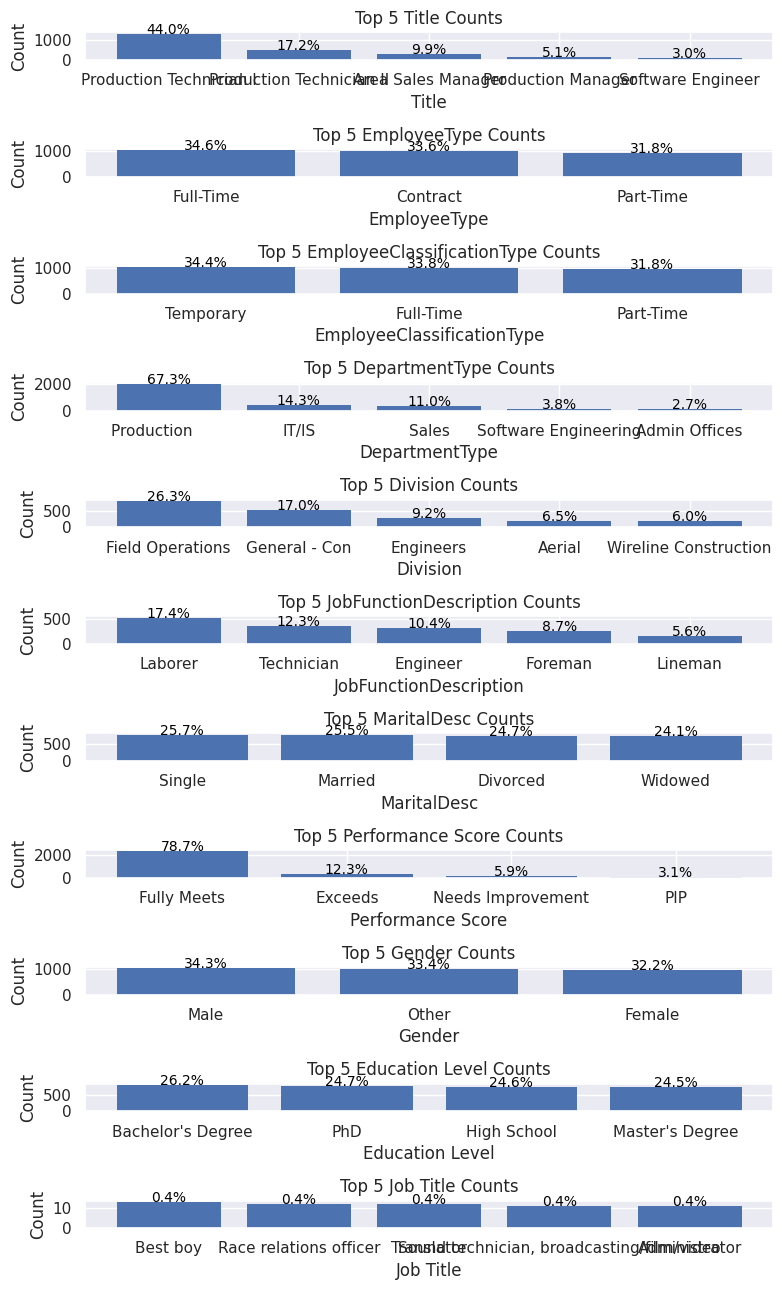

In [36]:
categorical_columns = gambung_2.select_dtypes(exclude='number').drop(['EmployeeStatus', 'StartDate', 'ExitDate'], axis=1).columns

# Membuat subplot sesuai dengan jumlah kolom kategorikal yang dipilih
num_subplots = len(categorical_columns)
fig, axes = plt.subplots(num_subplots, 1, figsize=(8, 13))
plt.style.use('default')

for i, predictor in enumerate(categorical_columns):
    ax = axes[i]
    counts = gambung_2[predictor].value_counts().head(5)  # Mengambil 5 kategori paling besar
    bars = ax.bar(counts.index, counts.values)

    total = float(len(gambung_2))  # Total jumlah data dalam DataFrame

    for bar in bars:
        percentage = '{:.1f}%'.format(100 * bar.get_height() / total)
        x = bar.get_x() + bar.get_width() / 2
        y = bar.get_height()
        ax.annotate(percentage, (x, y), ha='center')

    ax.set_xlabel(predictor)
    ax.set_ylabel('Count')
    ax.set_title(f'Top 5 {predictor} Counts')

plt.tight_layout()
plt.show()

In [37]:
gambung_2['Duration'] = (gambung_2['ExitDate'] - gambung_2['StartDate']).dt.days

# Sekarang, Anda memiliki kolom "Duration" yang berisi durasi dalam hari
print(gambung_2[['StartDate', 'ExitDate', 'Duration']])

      StartDate   ExitDate  Duration
0    2019-08-29        NaT       NaN
1    2022-12-12 2023-05-28     167.0
2    2023-03-08 2023-03-15       7.0
3    2020-05-29 2021-03-05     280.0
4    2022-09-16        NaT       NaN
...         ...        ...       ...
2995 2021-09-01        NaT       NaN
2996 2019-07-16        NaT       NaN
2997 2021-12-24 2022-07-27     215.0
2998 2019-04-17 2021-08-17     853.0
2999 2019-10-26 2021-06-08     591.0

[3000 rows x 3 columns]


In [38]:
gambung_2.head()

Employee ID  Engagement Score  Satisfaction Score  Work-Life Balance Score  \
0         1001                 2                   5                        5   
1         1002                 4                   5                        3   
2         1003                 2                   5                        2   
3         1004                 3                   5                        3   
4         1005                 2                   4                        5   

   StartDate   ExitDate              Title EmployeeStatus EmployeeType  \
0 2019-08-29        NaT  Software Engineer         Active    Part-Time   
1 2022-12-12 2023-05-28  Software Engineer         Active    Part-Time   
2 2023-03-08 2023-03-15  Software Engineer         Active     Contract   
3 2020-05-29 2021-03-05  Software Engineer         Active    Part-Time   
4 2022-09-16        NaT  Software Engineer         Active    Full-Time   

  EmployeeClassificationType        DepartmentType                  Division  \
0                  Part-Time  Software Engineering                 Engineers   
1                  Temporary  Software Engineering                      Catv   
2                  Part-Time  Software Engineering          Field Operations   
3                  Part-Time  Software Engineering  Project Management - Con   
4                  Temporary  Software Engineering          Field Operations   

  JobFunctionDescription MaritalDesc Performance Score  \
0               Engineer     Married       Fully Meets   
1                Foreman     Widowed       Fully Meets   
2                Foreman     Married       Fully Meets   
3            Coordinator      Single       Fully Meets   
4        Project Manager    Divorced       Fully Meets   

   Current Employee Rating  Gender    Education Level  Years of Experience  \
0                        3    Male        High School                    8   
1                        3    Male  Bachelor's Degree                   17   
2                        3  Female                PhD                   20   
3                        3   Other        High School                    8   
4                        3   Other    Master's Degree                    0   

   Desired Salary                                  Job Title  Duration  
0        60103.21                   Chief Technology Officer       NaN  
1        64575.84                        Designer, furniture     167.0  
2        39422.71  Sound technician, broadcasting/film/video       7.0  
3        51045.11                             Air cabin crew     280.0  
4        52792.86                              Art therapist       NaN

In [39]:
gambung_2 = gambung_2.fillna('masih')

In [40]:
gambung_2['Duration'] = gambung_2['Duration'].replace('masih', np.nan)

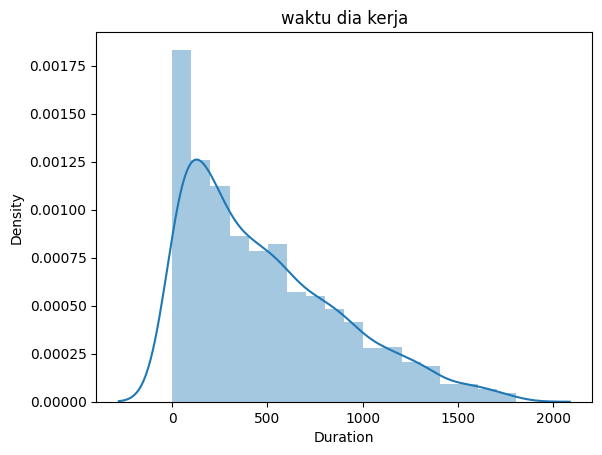

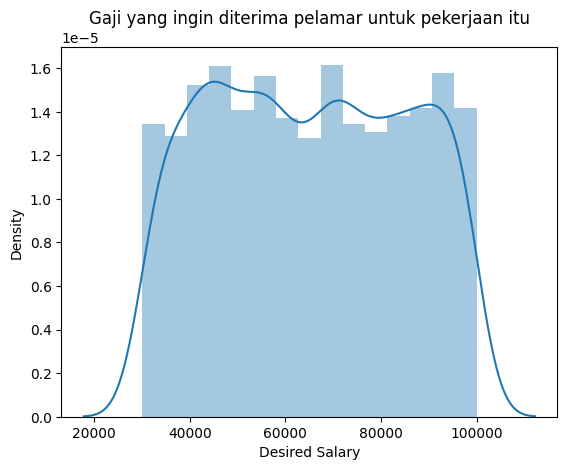

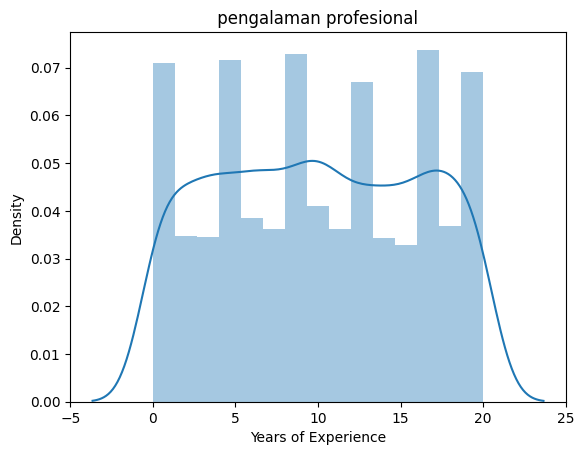

In [41]:
fig = sns.distplot(gambung_2['Duration'], kde=True,hist=True)
plt.title("waktu dia kerja")
plt.show()

fig = sns.distplot(gambung_2['Desired Salary'], kde=True,hist=True)
plt.title("Gaji yang ingin diterima pelamar untuk pekerjaan itu")
plt.show()

fig = sns.distplot(gambung_2['Years of Experience'], kde=True,hist=True)
plt.title(" pengalaman profesional ")
plt.show()


In [42]:
gambung_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000 entries, 0 to 2999
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Employee ID                 3000 non-null   int64         
 1   Engagement Score            3000 non-null   int64         
 2   Satisfaction Score          3000 non-null   int64         
 3   Work-Life Balance Score     3000 non-null   int64         
 4   StartDate                   3000 non-null   datetime64[ns]
 5   ExitDate                    3000 non-null   object        
 6   Title                       3000 non-null   object        
 7   EmployeeStatus              3000 non-null   object        
 8   EmployeeType                3000 non-null   object        
 9   EmployeeClassificationType  3000 non-null   object        
 10  DepartmentType              3000 non-null   object        
 11  Division                    3000 non-null   object      

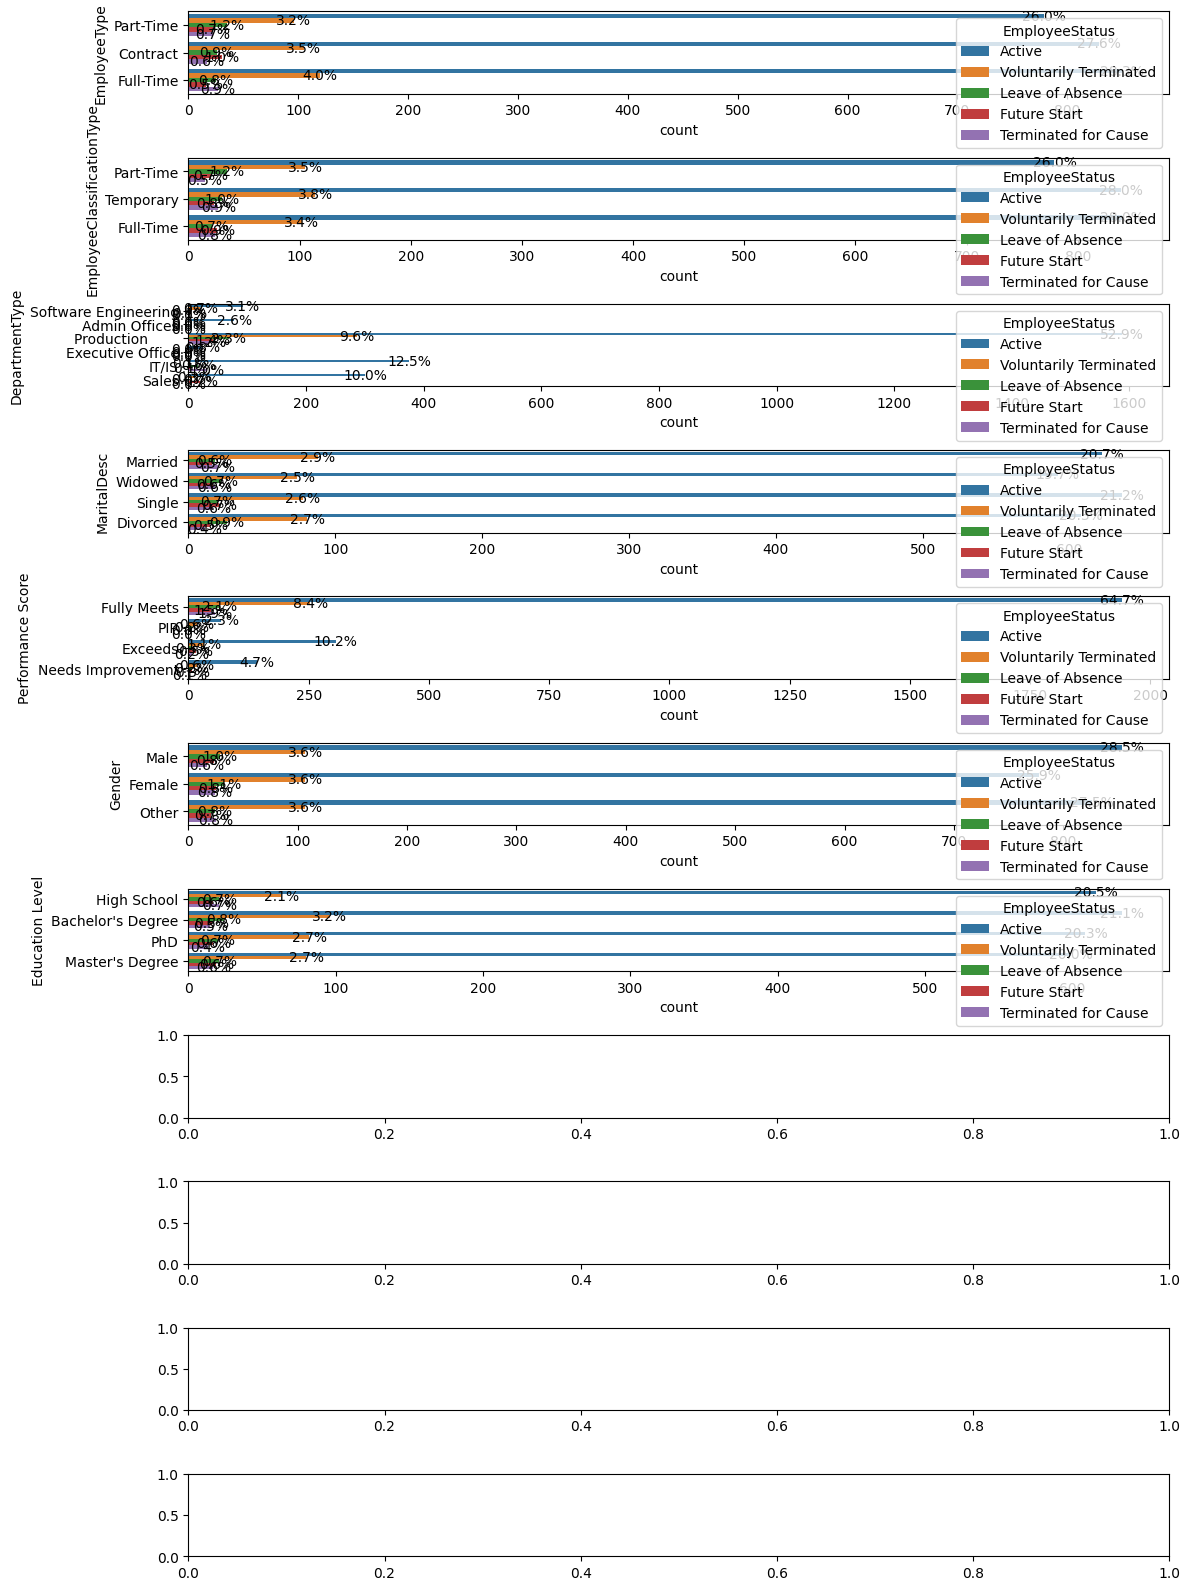

In [43]:
plt.style.use('default')
total = float(len(gambung_2))
# Mengatur ukuran plot lebih besar
fig, ax = plt.subplots(len(categorical_columns), 1, figsize=(12, 16))
ax = ax.flatten()

# Menghilangkan 'Job Title' dan 'Title' dari list categorical_columns
categorical_columns = [col for col in categorical_columns if col not in ['Job Title', 'Title','Division','JobFunctionDescription',]]

for i, predictor in enumerate(categorical_columns):
    plt.style.use('default')
    q = sns.countplot(data=gambung_2, y=predictor, hue='EmployeeStatus', ax=ax[i])
    for p in q.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_width()
        y = p.get_y() + p.get_height() / 2
        q.annotate(percentage, (x, y), ha='center', va='center')

plt.tight_layout()
plt.show()

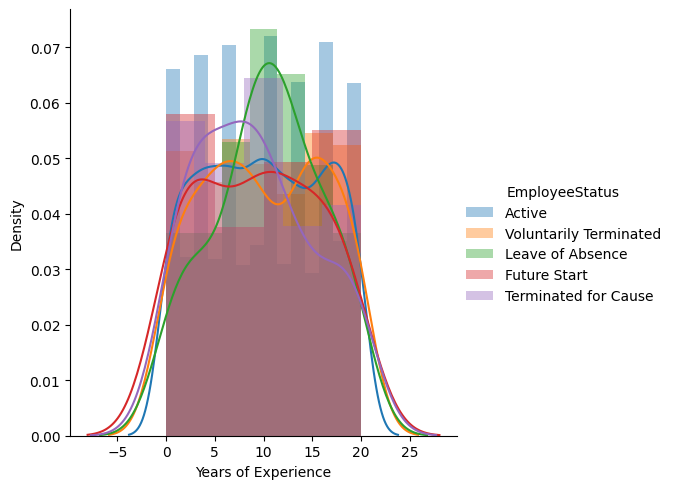

In [44]:
plt.style.use('default')
sns.FacetGrid(gambung_2, hue='EmployeeStatus', height=5).map(sns.distplot, 'Years of Experience').add_legend()

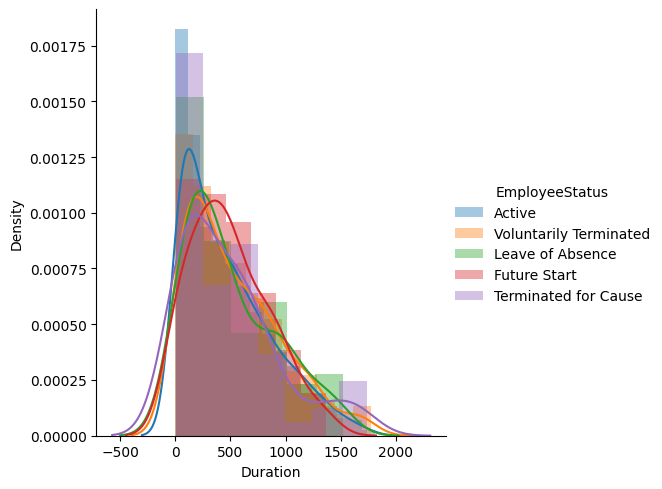

In [45]:
plt.style.use('default')
sns.FacetGrid(gambung_2, hue='EmployeeStatus', height=5).map(sns.distplot, 'Duration').add_legend()

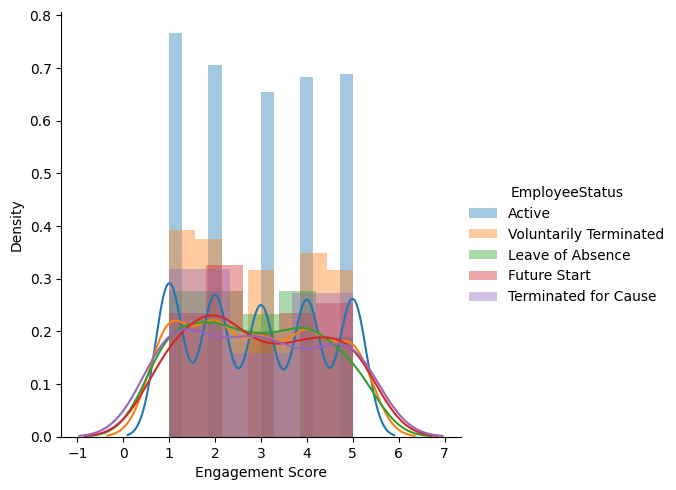

In [46]:
plt.style.use('default')
sns.FacetGrid(gambung_2, hue='EmployeeStatus', height=5).map(sns.distplot, 'Engagement Score').add_legend()


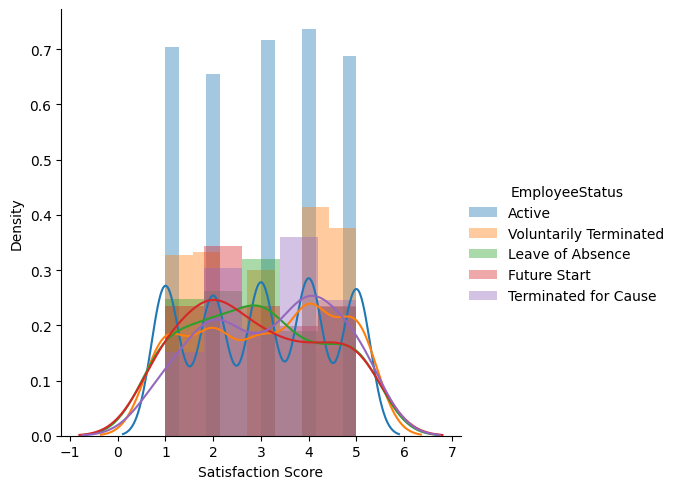

In [47]:
plt.style.use('default')
sns.FacetGrid(gambung_2, hue='EmployeeStatus', height=5).map(sns.distplot, 'Satisfaction Score').add_legend()

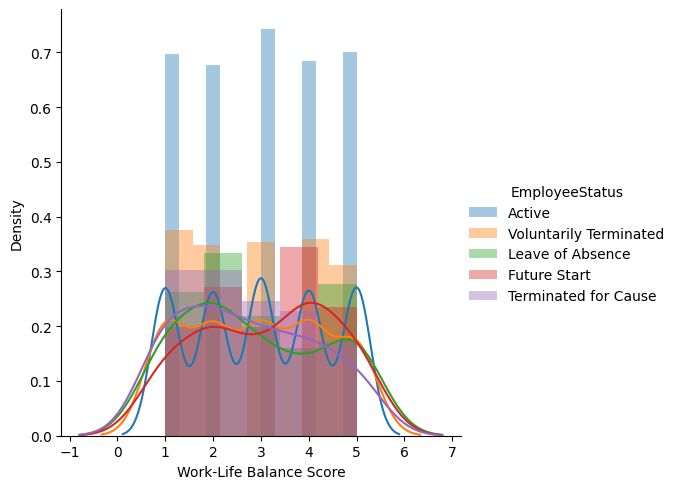

In [48]:
plt.style.use('default')
sns.FacetGrid(gambung_2, hue='EmployeeStatus', height=5).map(sns.distplot, 'Work-Life Balance Score').add_legend()

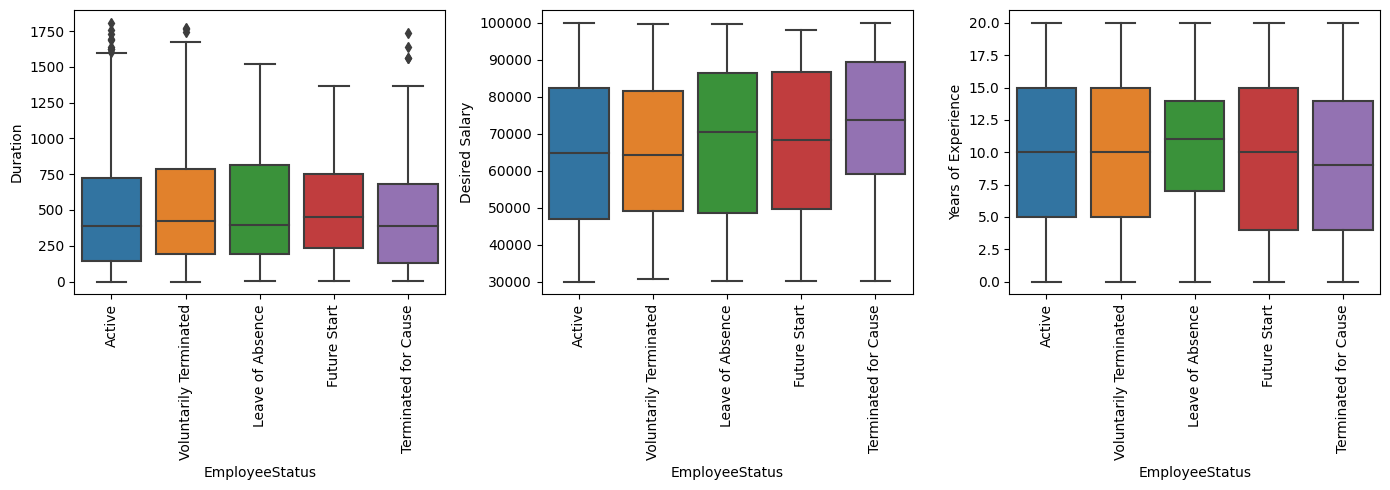

In [49]:
column_list = ['Duration', 'Desired Salary',  'Years of Experience']

plt.style.use('default')
fig, ax = plt.subplots(1, len(column_list), figsize=(14, 5), sharey=False)

for i, col in enumerate(column_list):
    sns.boxplot(data=gambung_2, x='EmployeeStatus', y=col, ax=ax[i])

    ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=90, ha='center')

plt.tight_layout()
plt.show()


In [50]:
gambung_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000 entries, 0 to 2999
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Employee ID                 3000 non-null   int64         
 1   Engagement Score            3000 non-null   int64         
 2   Satisfaction Score          3000 non-null   int64         
 3   Work-Life Balance Score     3000 non-null   int64         
 4   StartDate                   3000 non-null   datetime64[ns]
 5   ExitDate                    3000 non-null   object        
 6   Title                       3000 non-null   object        
 7   EmployeeStatus              3000 non-null   object        
 8   EmployeeType                3000 non-null   object        
 9   EmployeeClassificationType  3000 non-null   object        
 10  DepartmentType              3000 non-null   object        
 11  Division                    3000 non-null   object      

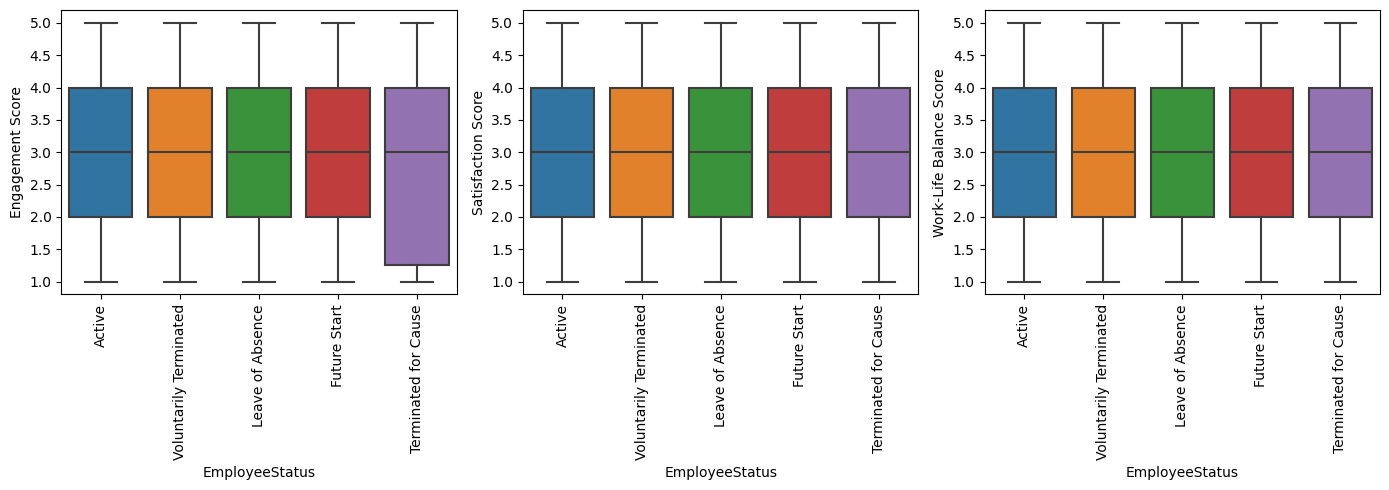

In [51]:
column_list = ['Engagement Score', 'Satisfaction Score',  'Work-Life Balance Score']

plt.style.use('default')
fig, ax = plt.subplots(1, len(column_list), figsize=(14, 5), sharey=False)

for i, col in enumerate(column_list):
    sns.boxplot(data=gambung_2, x='EmployeeStatus', y=col, ax=ax[i])

    ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=90, ha='center')

plt.tight_layout()
plt.show()

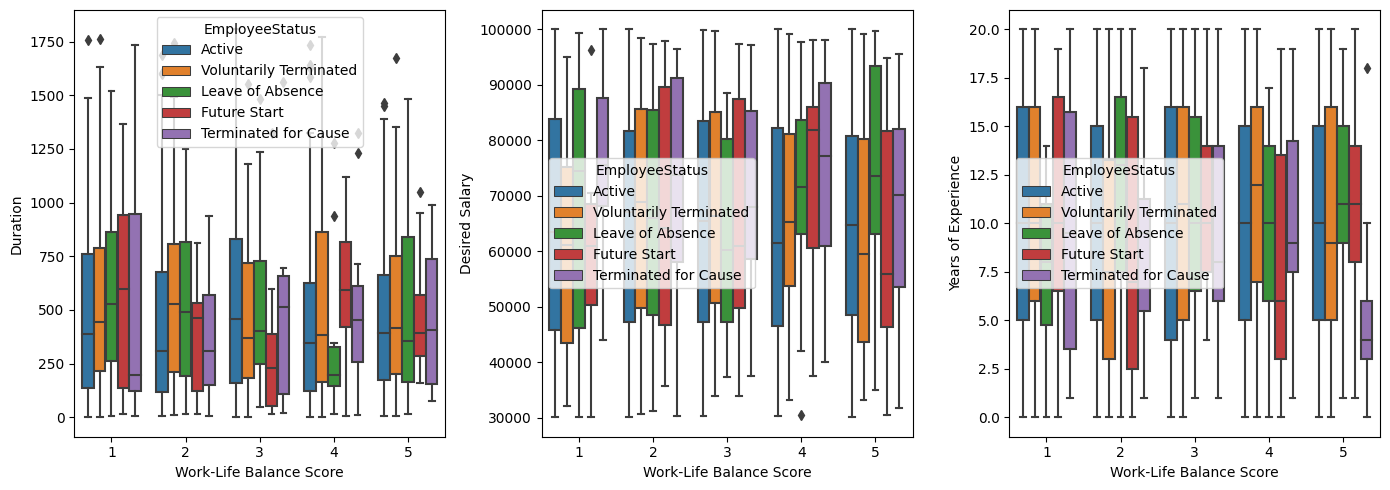

In [52]:
column_list = ['Duration', 'Desired Salary', 'Years of Experience']

plt.style.use('default')
fig, ax = plt.subplots(1, 3, figsize=(14, 5), sharey=False)
ax = ax.flatten()

for i, col in enumerate(column_list):
    sns.boxplot(data=gambung_2, x='Work-Life Balance Score', y=col, hue='EmployeeStatus', ax=ax[i])

plt.tight_layout()
plt.show()

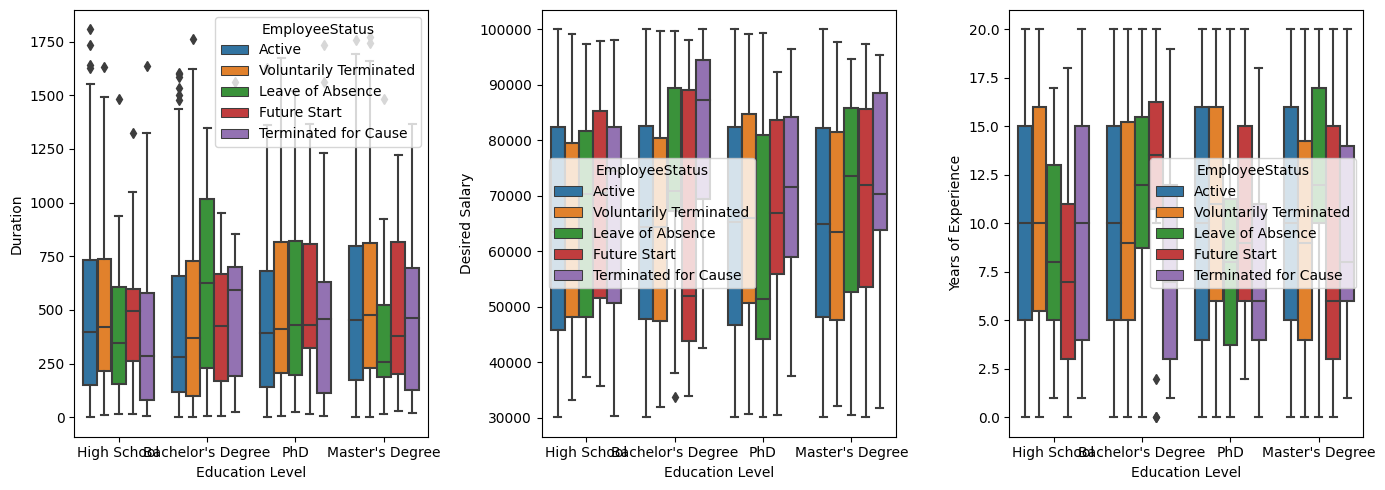

In [53]:
column_list = ['Duration', 'Desired Salary', 'Years of Experience']

plt.style.use('default')
fig, ax = plt.subplots(1, 3, figsize=(14, 5), sharey=False)
ax = ax.flatten()

for i, col in enumerate(column_list):
    sns.boxplot(data=gambung_2, x='Education Level', y=col, hue='EmployeeStatus', ax=ax[i])

plt.tight_layout()
plt.show()

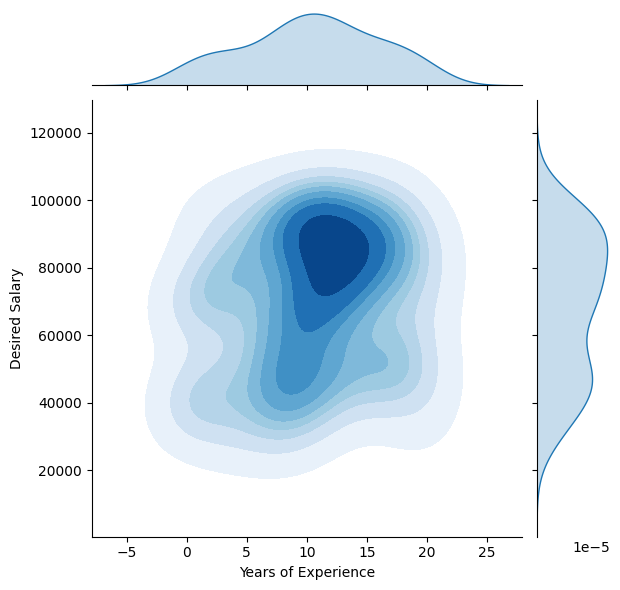

In [54]:
df_churn = gambung_2[gambung_2["EmployeeStatus"]=="Leave of Absence"]

sns.jointplot(x="Years of Experience", y="Desired Salary", data=df_churn, kind="kde", cmap="Blues", shade=True, shade_lowest=False, fill=True);
plt.show();

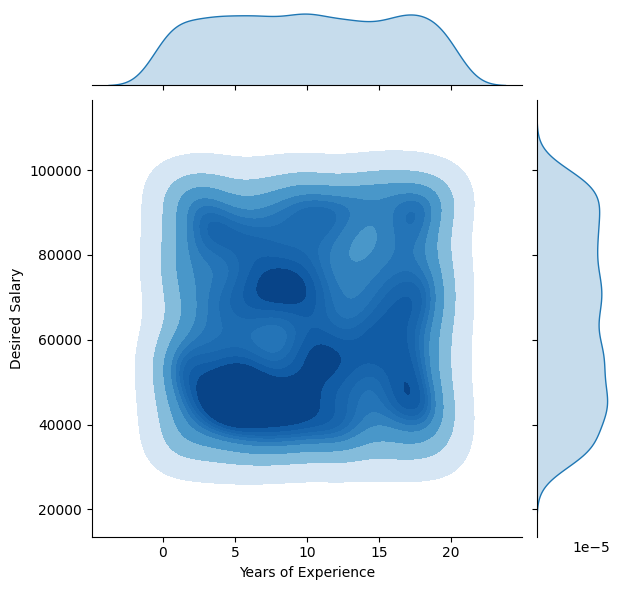

In [55]:
df_churn = gambung_2[gambung_2["EmployeeStatus"]=="Active"]

sns.jointplot(x="Years of Experience", y="Desired Salary", data=df_churn, kind="kde", cmap="Blues", shade=True, shade_lowest=False, fill=True);
plt.show();

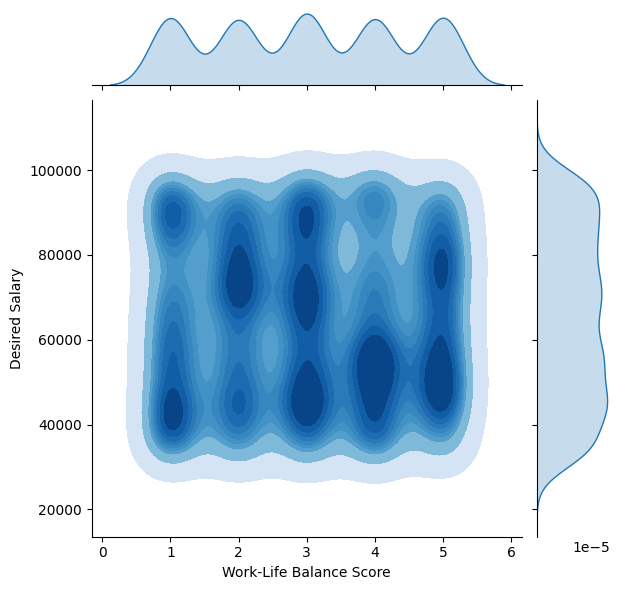

In [56]:
sns.jointplot(x="Work-Life Balance Score", y="Desired Salary", data=df_churn, kind="kde", cmap="Blues", shade=True, shade_lowest=False, fill=True);
plt.show();

<Axes: >

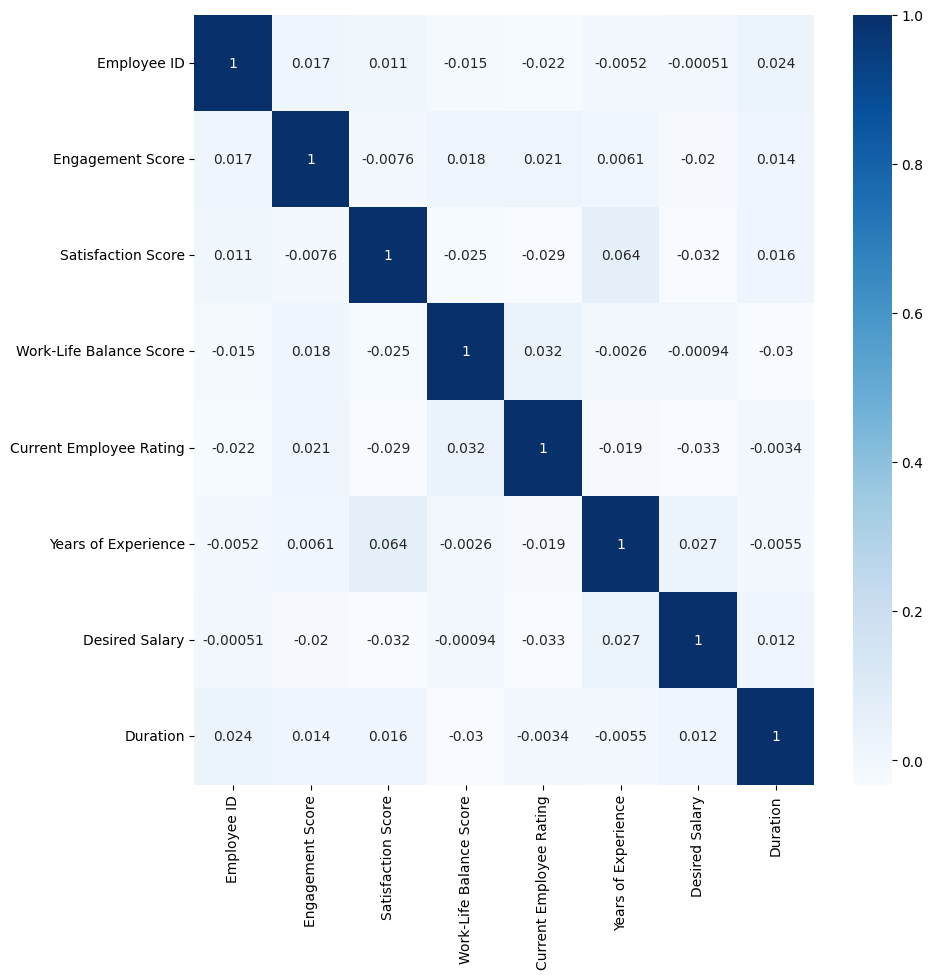

In [57]:
plt.figure(figsize=(10,10))
sns.heatmap(gambung_2.corr(),cbar=True,annot=True,cmap='Blues')

## Data Preprocessing for Modelling

In [58]:
gambung_2["Gender"]= gambung_2["Gender"].map({"Male": 0, "Female":1, "Other":2})

In [59]:
gambung_2.head()

Employee ID  Engagement Score  Satisfaction Score  Work-Life Balance Score  \
0         1001                 2                   5                        5   
1         1002                 4                   5                        3   
2         1003                 2                   5                        2   
3         1004                 3                   5                        3   
4         1005                 2                   4                        5   

   StartDate             ExitDate              Title EmployeeStatus  \
0 2019-08-29                masih  Software Engineer         Active   
1 2022-12-12  2023-05-28 00:00:00  Software Engineer         Active   
2 2023-03-08  2023-03-15 00:00:00  Software Engineer         Active   
3 2020-05-29  2021-03-05 00:00:00  Software Engineer         Active   
4 2022-09-16                masih  Software Engineer         Active   

  EmployeeType EmployeeClassificationType        DepartmentType  \
0    Part-Time                  Part-Time  Software Engineering   
1    Part-Time                  Temporary  Software Engineering   
2     Contract                  Part-Time  Software Engineering   
3    Part-Time                  Part-Time  Software Engineering   
4    Full-Time                  Temporary  Software Engineering   

                   Division JobFunctionDescription MaritalDesc  \
0                 Engineers               Engineer     Married   
1                      Catv                Foreman     Widowed   
2          Field Operations                Foreman     Married   
3  Project Management - Con            Coordinator      Single   
4          Field Operations        Project Manager    Divorced   

  Performance Score  Current Employee Rating  Gender    Education Level  \
0       Fully Meets                        3       0        High School   
1       Fully Meets                        3       0  Bachelor's Degree   
2       Fully Meets                        3       1                PhD   
3       Fully Meets                        3       2        High School   
4       Fully Meets                        3       2    Master's Degree   

   Years of Experience  Desired Salary  \
0                    8        60103.21   
1                   17        64575.84   
2                   20        39422.71   
3                    8        51045.11   
4                    0        52792.86   

                                   Job Title  Duration  
0                   Chief Technology Officer       NaN  
1                        Designer, furniture     167.0  
2  Sound technician, broadcasting/film/video       7.0  
3                             Air cabin crew     280.0  
4                              Art therapist       NaN

In [60]:
gambung_2 = pd.get_dummies(gambung_2, columns=['EmployeeStatus'], prefix=['EmployeeStatus'])
gambung_2.head()

Employee ID  Engagement Score  Satisfaction Score  Work-Life Balance Score  \
0         1001                 2                   5                        5   
1         1002                 4                   5                        3   
2         1003                 2                   5                        2   
3         1004                 3                   5                        3   
4         1005                 2                   4                        5   

   StartDate             ExitDate              Title EmployeeType  \
0 2019-08-29                masih  Software Engineer    Part-Time   
1 2022-12-12  2023-05-28 00:00:00  Software Engineer    Part-Time   
2 2023-03-08  2023-03-15 00:00:00  Software Engineer     Contract   
3 2020-05-29  2021-03-05 00:00:00  Software Engineer    Part-Time   
4 2022-09-16                masih  Software Engineer    Full-Time   

  EmployeeClassificationType        DepartmentType                  Division  \
0                  Part-Time  Software Engineering                 Engineers   
1                  Temporary  Software Engineering                      Catv   
2                  Part-Time  Software Engineering          Field Operations   
3                  Part-Time  Software Engineering  Project Management - Con   
4                  Temporary  Software Engineering          Field Operations   

  JobFunctionDescription MaritalDesc Performance Score  \
0               Engineer     Married       Fully Meets   
1                Foreman     Widowed       Fully Meets   
2                Foreman     Married       Fully Meets   
3            Coordinator      Single       Fully Meets   
4        Project Manager    Divorced       Fully Meets   

   Current Employee Rating  Gender    Education Level  Years of Experience  \
0                        3       0        High School                    8   
1                        3       0  Bachelor's Degree                   17   
2                        3       1                PhD                   20   
3                        3       2        High School                    8   
4                        3       2    Master's Degree                    0   

   Desired Salary                                  Job Title  Duration  \
0        60103.21                   Chief Technology Officer       NaN   
1        64575.84                        Designer, furniture     167.0   
2        39422.71  Sound technician, broadcasting/film/video       7.0   
3        51045.11                             Air cabin crew     280.0   
4        52792.86                              Art therapist       NaN   

   EmployeeStatus_Active  EmployeeStatus_Future Start  \
0                      1                            0   
1                      1                            0   
2                      1                            0   
3                      1                            0   
4                      1                            0   

   EmployeeStatus_Leave of Absence  EmployeeStatus_Terminated for Cause  \
0                                0                                    0   
1                                0                                    0   
2                                0                                    0   
3                                0                                    0   
4                                0                                    0   

   EmployeeStatus_Voluntarily Terminated  
0                                      0  
1                                      0  
2                                      0  
3                                      0  
4                                      0

In [61]:
columns_to_drop_3 = ['StartDate', 'Employee ID', 'ExitDate', 'Title', 'EmployeeClassificationType', 'JobFunctionDescription', 'Job Title', 'MaritalDesc']
gambung_2 = gambung_2.drop(columns=columns_to_drop_3)

print("\nNama Kolom Setelah Penghapusan:")
print(gambung_2.columns)


Nama Kolom Setelah Penghapusan:
Index(['Engagement Score', 'Satisfaction Score', 'Work-Life Balance Score',
       'EmployeeType', 'DepartmentType', 'Division', 'Performance Score',
       'Current Employee Rating', 'Gender', 'Education Level',
       'Years of Experience', 'Desired Salary', 'Duration',
       'EmployeeStatus_Active', 'EmployeeStatus_Future Start',
       'EmployeeStatus_Leave of Absence',
       'EmployeeStatus_Terminated for Cause',
       'EmployeeStatus_Voluntarily Terminated'],
      dtype='object')


In [62]:
df_dummies = pd.get_dummies(data=gambung_2, drop_first=True)

In [63]:
df_dummies.head()

Engagement Score  Satisfaction Score  Work-Life Balance Score  \
0                 2                   5                        5   
1                 4                   5                        3   
2                 2                   5                        2   
3                 3                   5                        3   
4                 2                   4                        5   

   Current Employee Rating  Gender  Years of Experience  Desired Salary  \
0                        3       0                    8        60103.21   
1                        3       0                   17        64575.84   
2                        3       1                   20        39422.71   
3                        3       2                    8        51045.11   
4                        3       2                    0        52792.86   

   Duration  EmployeeStatus_Active  EmployeeStatus_Future Start  \
0       NaN                      1                            0   
1     167.0                      1                            0   
2       7.0                      1                            0   
3     280.0                      1                            0   
4       NaN                      1                            0   

   EmployeeStatus_Leave of Absence  EmployeeStatus_Terminated for Cause  \
0                                0                                    0   
1                                0                                    0   
2                                0                                    0   
3                                0                                    0   
4                                0                                    0   

   EmployeeStatus_Voluntarily Terminated  EmployeeType_Full-Time  \
0                                      0                       0   
1                                      0                       0   
2                                      0                       0   
3                                      0                       0   
4                                      0                       1   

   EmployeeType_Part-Time  DepartmentType_Executive Office  \
0                       1                                0   
1                       1                                0   
2                       0                                0   
3                       1                                0   
4                       0                                0   

   DepartmentType_IT/IS  DepartmentType_Production         \
0                     0                                 0   
1                     0                                 0   
2                     0                                 0   
3                     0                                 0   
4                     0                                 0   

   DepartmentType_Sales  DepartmentType_Software Engineering  \
0                     0                                    1   
1                     0                                    1   
2                     0                                    1   
3                     0                                    1   
4                     0                                    1   

   Division_Billable Consultants  Division_Catv  Division_Corp Operations  \
0                              0              0                         0   
1                              0              1                         0   
2                              0              0                         0   
3                              0              0                         0   
4                              0              0                         0   

   Division_Engineers  Division_Executive  Division_Field Operations  \
0                   1                   0                          0   
1                   0                   0                          0   
2                   0                   0                          1   
3   

In [64]:
from sklearn.preprocessing import StandardScaler

# Inisialisasi StandardScaler
scale = StandardScaler()


# Menampilkan hasilnya
df_dummies.head()


Engagement Score  Satisfaction Score  Work-Life Balance Score  \
0                 2                   5                        5   
1                 4                   5                        3   
2                 2                   5                        2   
3                 3                   5                        3   
4                 2                   4                        5   

   Current Employee Rating  Gender  Years of Experience  Desired Salary  \
0                        3       0                    8        60103.21   
1                        3       0                   17        64575.84   
2                        3       1                   20        39422.71   
3                        3       2                    8        51045.11   
4                        3       2                    0        52792.86   

   Duration  EmployeeStatus_Active  EmployeeStatus_Future Start  \
0       NaN                      1                            0   
1     167.0                      1                            0   
2       7.0                      1                            0   
3     280.0                      1                            0   
4       NaN                      1                            0   

   EmployeeStatus_Leave of Absence  EmployeeStatus_Terminated for Cause  \
0                                0                                    0   
1                                0                                    0   
2                                0                                    0   
3                                0                                    0   
4                                0                                    0   

   EmployeeStatus_Voluntarily Terminated  EmployeeType_Full-Time  \
0                                      0                       0   
1                                      0                       0   
2                                      0                       0   
3                                      0                       0   
4                                      0                       1   

   EmployeeType_Part-Time  DepartmentType_Executive Office  \
0                       1                                0   
1                       1                                0   
2                       0                                0   
3                       1                                0   
4                       0                                0   

   DepartmentType_IT/IS  DepartmentType_Production         \
0                     0                                 0   
1                     0                                 0   
2                     0                                 0   
3                     0                                 0   
4                     0                                 0   

   DepartmentType_Sales  DepartmentType_Software Engineering  \
0                     0                                    1   
1                     0                                    1   
2                     0                                    1   
3                     0                                    1   
4                     0                                    1   

   Division_Billable Consultants  Division_Catv  Division_Corp Operations  \
0                              0              0                         0   
1                              0              1                         0   
2                              0              0                         0   
3                              0              0                         0   
4                              0              0                         0   

   Division_Engineers  Division_Executive  Division_Field Operations  \
0                   1                   0                          0   
1                   0                   0                          0   
2                   0                   0                          1   
3   

In [65]:
df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000 entries, 0 to 2999
Data columns (total 50 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Engagement Score                       3000 non-null   int64  
 1   Satisfaction Score                     3000 non-null   int64  
 2   Work-Life Balance Score                3000 non-null   int64  
 3   Current Employee Rating                3000 non-null   int64  
 4   Gender                                 3000 non-null   int64  
 5   Years of Experience                    3000 non-null   int64  
 6   Desired Salary                         3000 non-null   float64
 7   Duration                               1533 non-null   float64
 8   EmployeeStatus_Active                  3000 non-null   uint8  
 9   EmployeeStatus_Future Start            3000 non-null   uint8  
 10  EmployeeStatus_Leave of Absence        3000 non-null   uint8  
 11  Empl

In [66]:
df_dummies.fillna(0, inplace=True)
df_dummies = df_dummies.astype('int64')

In [67]:
df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000 entries, 0 to 2999
Data columns (total 50 columns):
 #   Column                                 Non-Null Count  Dtype
---  ------                                 --------------  -----
 0   Engagement Score                       3000 non-null   int64
 1   Satisfaction Score                     3000 non-null   int64
 2   Work-Life Balance Score                3000 non-null   int64
 3   Current Employee Rating                3000 non-null   int64
 4   Gender                                 3000 non-null   int64
 5   Years of Experience                    3000 non-null   int64
 6   Desired Salary                         3000 non-null   int64
 7   Duration                               3000 non-null   int64
 8   EmployeeStatus_Active                  3000 non-null   int64
 9   EmployeeStatus_Future Start            3000 non-null   int64
 10  EmployeeStatus_Leave of Absence        3000 non-null   int64
 11  EmployeeStatus_Terminated for 

In [68]:
df_dummies.head()

Engagement Score  Satisfaction Score  Work-Life Balance Score  \
0                 2                   5                        5   
1                 4                   5                        3   
2                 2                   5                        2   
3                 3                   5                        3   
4                 2                   4                        5   

   Current Employee Rating  Gender  Years of Experience  Desired Salary  \
0                        3       0                    8           60103   
1                        3       0                   17           64575   
2                        3       1                   20           39422   
3                        3       2                    8           51045   
4                        3       2                    0           52792   

   Duration  EmployeeStatus_Active  EmployeeStatus_Future Start  \
0         0                      1                            0   
1       167                      1                            0   
2         7                      1                            0   
3       280                      1                            0   
4         0                      1                            0   

   EmployeeStatus_Leave of Absence  EmployeeStatus_Terminated for Cause  \
0                                0                                    0   
1                                0                                    0   
2                                0                                    0   
3                                0                                    0   
4                                0                                    0   

   EmployeeStatus_Voluntarily Terminated  EmployeeType_Full-Time  \
0                                      0                       0   
1                                      0                       0   
2                                      0                       0   
3                                      0                       0   
4                                      0                       1   

   EmployeeType_Part-Time  DepartmentType_Executive Office  \
0                       1                                0   
1                       1                                0   
2                       0                                0   
3                       1                                0   
4                       0                                0   

   DepartmentType_IT/IS  DepartmentType_Production         \
0                     0                                 0   
1                     0                                 0   
2                     0                                 0   
3                     0                                 0   
4                     0                                 0   

   DepartmentType_Sales  DepartmentType_Software Engineering  \
0                     0                                    1   
1                     0                                    1   
2                     0                                    1   
3                     0                                    1   
4                     0                                    1   

   Division_Billable Consultants  Division_Catv  Division_Corp Operations  \
0                              0              0                         0   
1                              0              1                         0   
2                              0              0                         0   
3                              0              0                         0   
4                              0              0                         0   

   Division_Engineers  Division_Executive  Division_Field Operations  \
0                   1                   0                          0   
1                   0                   0                          0   
2                   0                   0                          1   
3   

In [69]:
X = df_dummies.drop(columns=['Performance Score_Fully Meets',
                             'Performance Score_Needs Improvement',
                             'Performance Score_PIP'])

y = df_dummies[['Performance Score_Fully Meets',
                'Performance Score_Needs Improvement',
                'Performance Score_PIP']].values

In [70]:
X.columns

Index(['Engagement Score', 'Satisfaction Score', 'Work-Life Balance Score',
       'Current Employee Rating', 'Gender', 'Years of Experience',
       'Desired Salary', 'Duration', 'EmployeeStatus_Active',
       'EmployeeStatus_Future Start', 'EmployeeStatus_Leave of Absence',
       'EmployeeStatus_Terminated for Cause',
       'EmployeeStatus_Voluntarily Terminated', 'EmployeeType_Full-Time',
       'EmployeeType_Part-Time', 'DepartmentType_Executive Office',
       'DepartmentType_IT/IS', 'DepartmentType_Production       ',
       'DepartmentType_Sales', 'DepartmentType_Software Engineering',
       'Division_Billable Consultants', 'Division_Catv',
       'Division_Corp Operations', 'Division_Engineers', 'Division_Executive',
       'Division_Field Operations', 'Division_Fielders',
       'Division_Finance & Accounting', 'Division_General - Con',
       'Division_General - Eng', 'Division_General - Sga', 'Division_Isp',
       'Division_People Services', 'Division_Project Management

<Axes: >

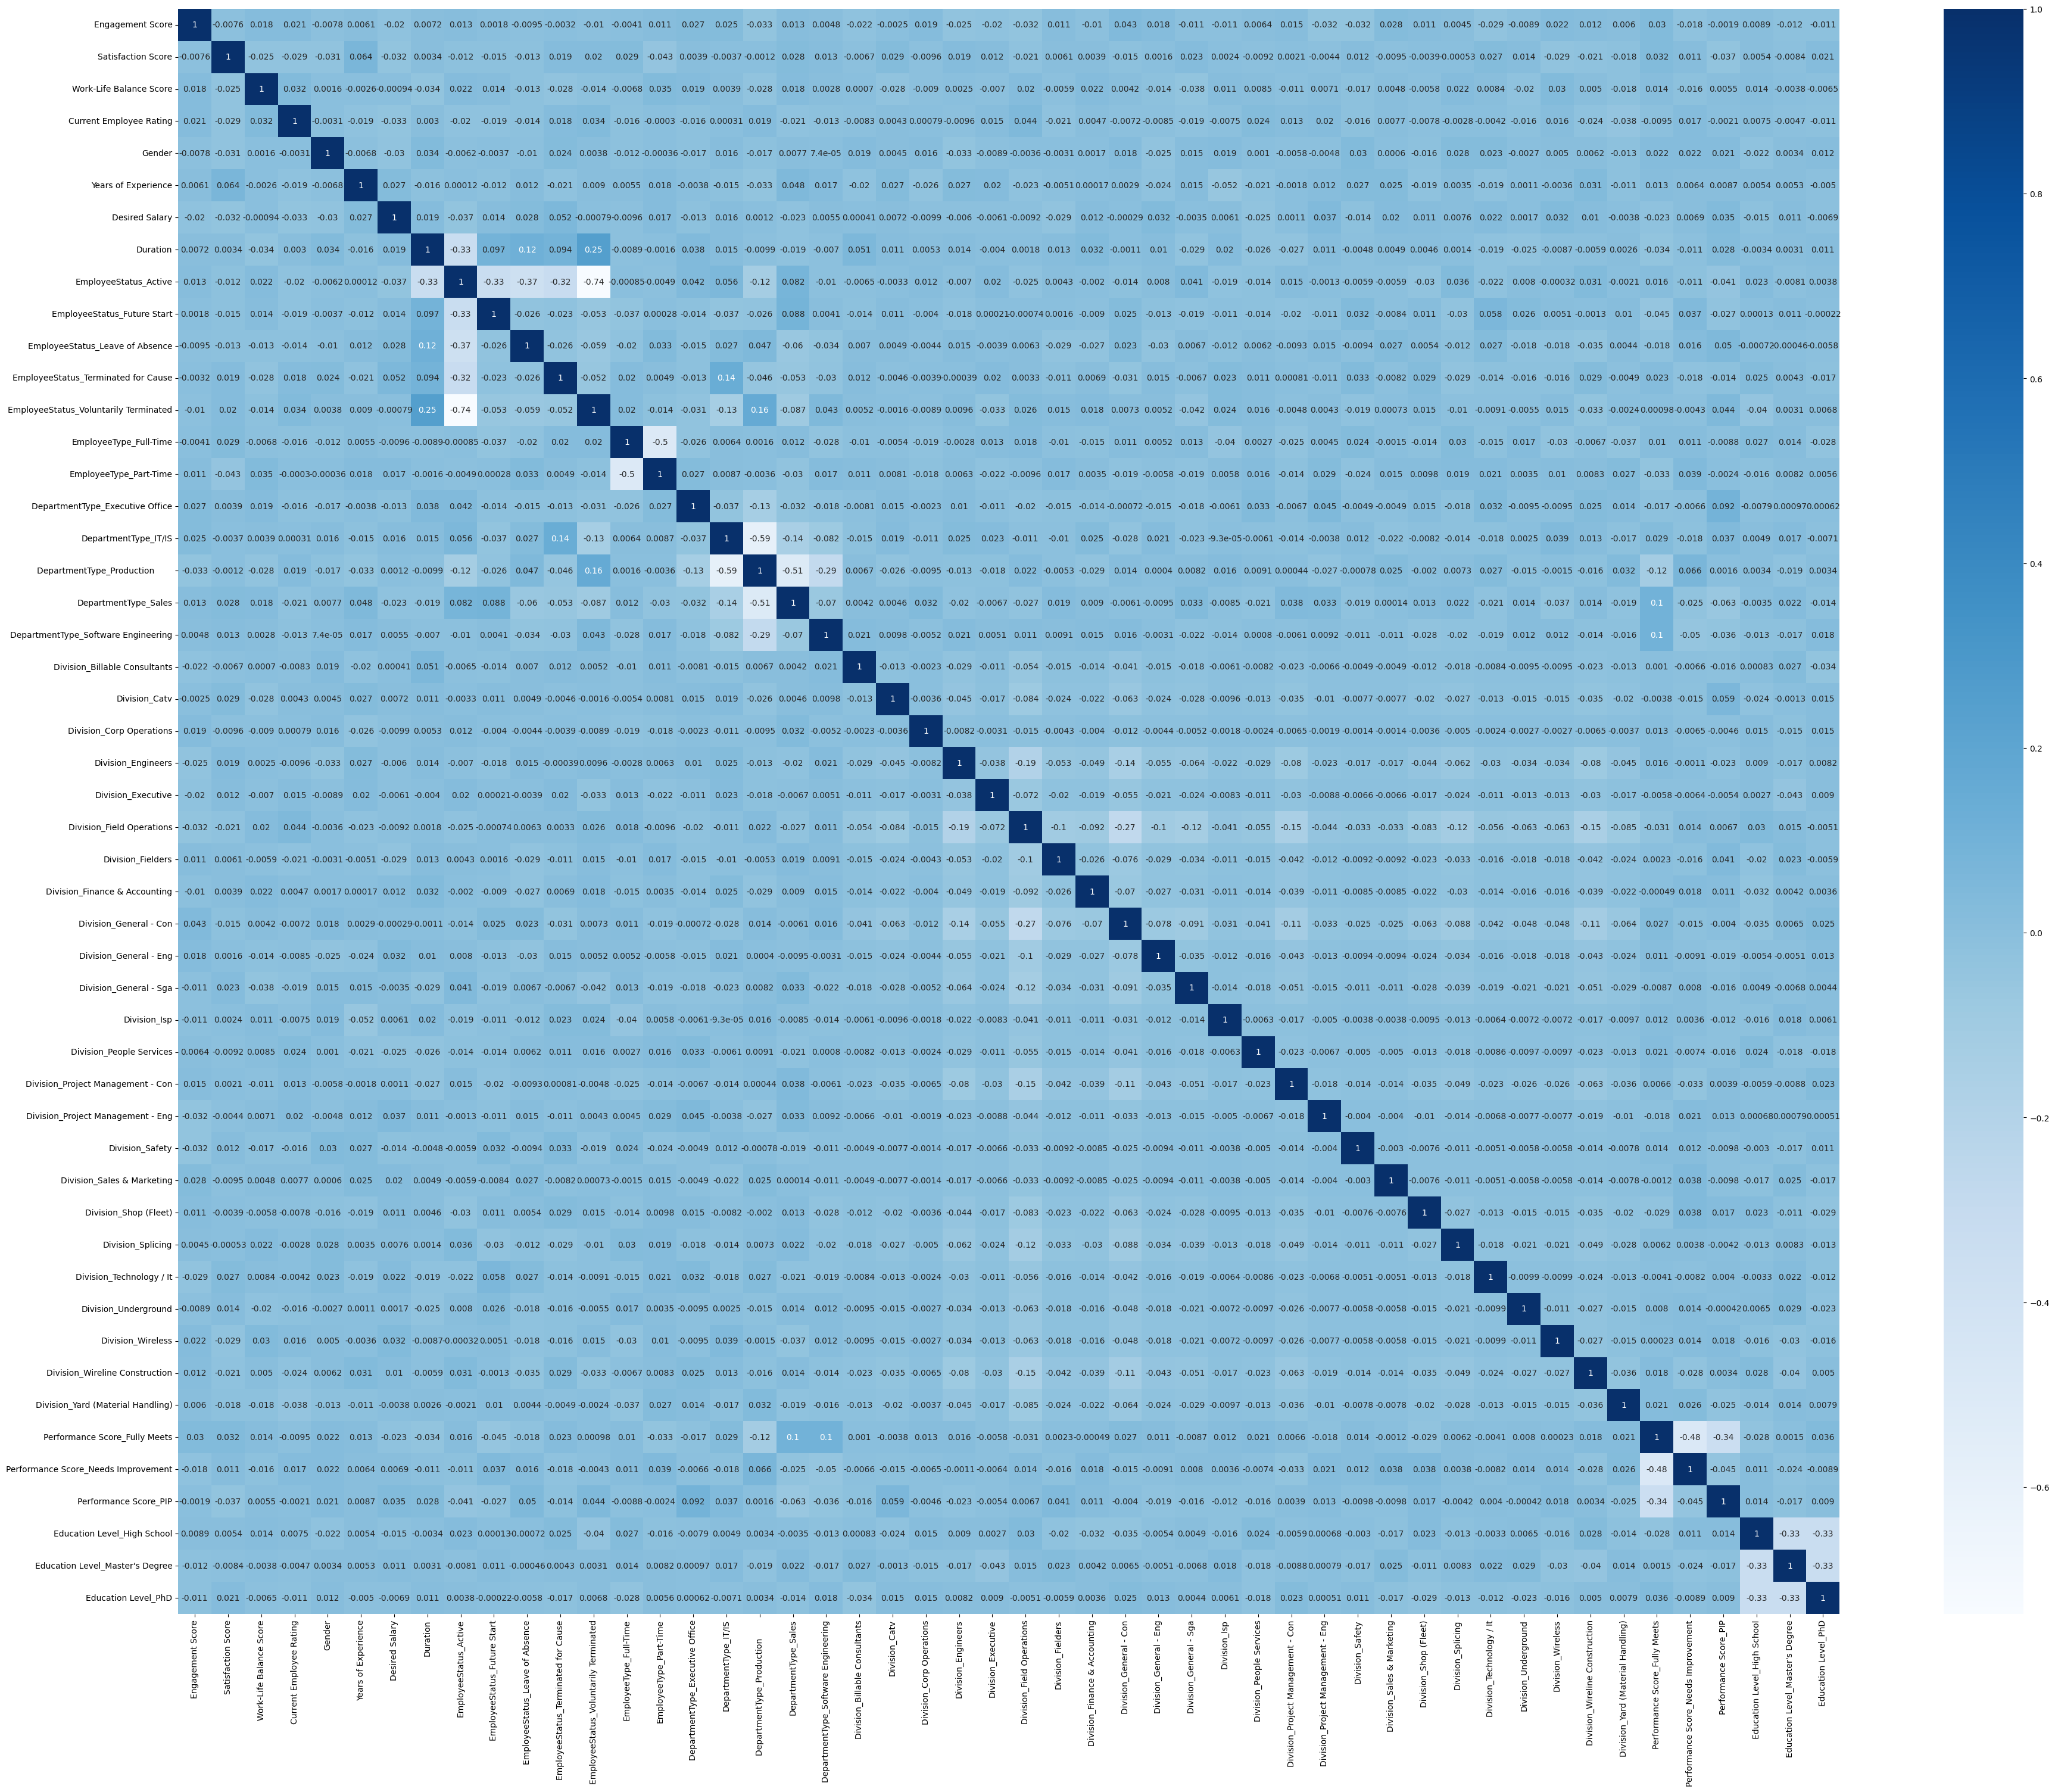

In [71]:
plt.figure(figsize=(45,35))
sns.heatmap(df_dummies.corr(),cbar=True,annot=True,cmap='Blues')

In [72]:
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)

print(selection.feature_importances_)

[7.39649633e-02 6.92203745e-02 7.15839647e-02 7.26082420e-02
 5.89382365e-02 9.20511123e-02 9.57927219e-02 7.02095786e-02
 1.16983034e-02 8.18112686e-03 8.26327189e-03 4.93339153e-03
 1.28477734e-02 3.03595298e-02 2.52170580e-02 2.42624125e-03
 2.76980442e-03 1.03777136e-02 3.84767857e-03 3.89283833e-03
 2.75351508e-03 6.07296341e-03 1.31653955e-05 1.78394003e-02
 6.66323541e-03 2.79887877e-02 8.68611526e-03 9.28180840e-03
 9.51668906e-03 8.69786827e-03 1.00163818e-02 1.65768584e-03
 2.10719863e-03 1.30878717e-02 3.57021139e-03 1.78360666e-03
 2.66600007e-03 1.14945117e-02 1.11671484e-02 2.79860582e-03
 5.55436367e-03 6.18566978e-03 1.39840248e-02 5.15101461e-03
 2.60983318e-02 3.00092258e-02 2.59706745e-02]


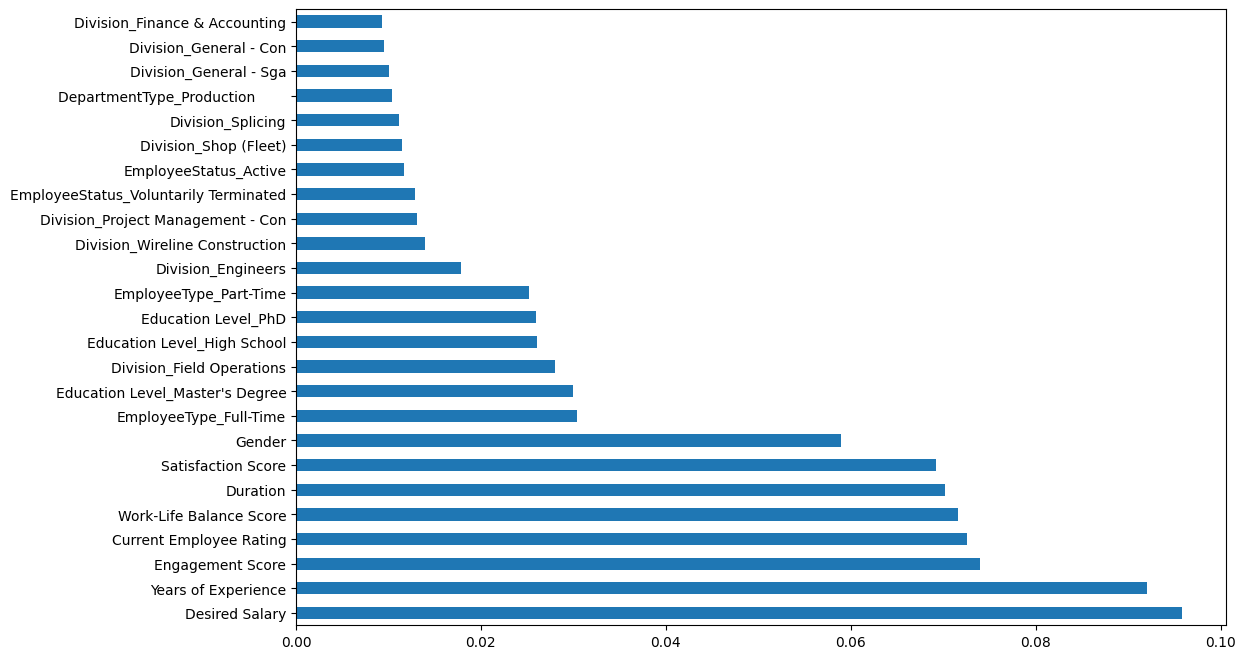

In [73]:
plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(25).plot(kind='barh')
plt.show()

In [74]:
# Checking for Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(z):
    # Calculating Variable Inflation Factor (VIF)
    vif = pd.DataFrame()
    vif["variables"] = z.columns
    vif["VIF"] = [variance_inflation_factor(z.values, i) for i in range(z.shape[1])]
    return(vif)

In [75]:
# Compute VIF on X
calc_vif(X)

variables        VIF
0                        Engagement Score   1.013981
1                      Satisfaction Score   1.021657
2                 Work-Life Balance Score   1.013166
3                 Current Employee Rating   1.014246
4                                  Gender   1.011686
5                     Years of Experience   1.021146
6                          Desired Salary   1.017715
7                                Duration   1.142261
8                   EmployeeStatus_Active  78.149078
9             EmployeeStatus_Future Start   3.234838
10        EmployeeStatus_Leave of Absence   3.816538
11    EmployeeStatus_Terminated for Cause   3.274242
12  EmployeeStatus_Voluntarily Terminated  11.716231
13                 EmployeeType_Full-Time   1.348981
14                 EmployeeType_Part-Time   1.345850
15        DepartmentType_Executive Office   1.303999
16                   DepartmentType_IT/IS   5.555932
17       DepartmentType_Production          8.745918
18                   DepartmentType_Sales   4.650454
19    DepartmentType_Software Engineering   2.383542
20          Division_Billable Consultants   1.122559
21                          Division_Catv   1.276002
22               Division_Corp Operations   1.014558
23                     Division_Engineers   2.194197
24                     Division_Executive   1.208975
25              Division_Field Operations   3.728883
26                      Division_Fielders   1.387646
27          Division_Finance & Accounting   1.336086
28                 Division_General - Con   3.008559
29                 Division_General - Eng   1.407836
30                 Division_General - Sga   1.545715
31                           Division_Isp   1.075520
32               Division_People Services   1.123964
33      Division_Project Management - Con   1.809712
34      Division_Project Management - Eng   1.085855
35                        Division_Safety   1.051246
36             Division_Sales & Marketing   1.048353
37                  Division_Shop (Fleet)   1.271812
38                      Division_Splicing   1.518301
39               Division_Technology / It   1.134026
40                   Division_Underground   1.160314
41                      Division_Wireless   1.171116
42         Division_Wireline Construction   1.817652
43      Division_Yard (Material Handling)   1.283625
44            Education Level_High School   1.480641
45        Education Level_Master's Degree   1.480353
46                    Education Level_PhD   1.476465

In [76]:
print(type(X))

<class 'pandas.core.frame.DataFrame'>


In [77]:
print(type(y))

<class 'numpy.ndarray'>


In [78]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 40, stratify=y)

In [79]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

In [80]:
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report

In [81]:
"""
#logistic regression model
lr = LogisticRegression(max_iter=1000)
cv_lr = cross_val_score(lr, X_train, y_train, cv=5).mean()
lr.fit(X_train, y_train)

#prediction with logistic regression model
y_predict = lr.predict(X_test)

#evaluation metrics for logistic regression model
lr_prec = precision_score(y_test, y_predict, average='weighted')
lr_rec = recall_score(y_test, y_predict, average='weighted')
lr_f1 = f1_score(y_test, y_predict, average='weighted')
lr_acc = accuracy_score(y_test, y_predict)
"""
#decision tree model
dt = tree.DecisionTreeClassifier(random_state=1)
cv_dt = cross_val_score(dt, X_train, y_train, cv=5).mean()
dt.fit(X_train, y_train)

#prediction with decision tree model
y_predict = dt.predict(X_test)

#evaluation metrics for decision tree model
dt_prec = precision_score(y_test, y_predict, average='weighted')
dt_rec = recall_score(y_test, y_predict, average='weighted')
dt_f1 = f1_score(y_test, y_predict, average='weighted')
dt_acc = accuracy_score(y_test, y_predict)

#random forest model
rf = RandomForestClassifier(random_state=1)
cv_rf = cross_val_score(rf, X_train, y_train, cv=5).mean()
rf.fit(X_train, y_train)

#prediction with random forest model
y_predict = rf.predict(X_test)

#evaluation metrics for random forest model
rf_prec = precision_score(y_test, y_predict, average='weighted')
rf_rec = recall_score(y_test, y_predict, average='weighted')
rf_f1 = f1_score(y_test, y_predict, average='weighted')
rf_acc = accuracy_score(y_test, y_predict)

#knn model
knn = KNeighborsClassifier()
cv_knn = cross_val_score(knn, X_train, y_train, cv=5).mean()
knn.fit(X_train, y_train)

#prediction with knn model
y_predict = knn.predict(X_test)

#evaluation metrics for knn model
knn_prec = precision_score(y_test, y_predict, average='weighted')
knn_rec = recall_score(y_test, y_predict, average='weighted')
knn_f1 = f1_score(y_test, y_predict, average='weighted')
knn_acc = accuracy_score(y_test, y_predict)
"""
#support vector classification model
svc = SVC(probability=True)
cv_svc = cross_val_score(svc, X_train, y_train, cv=5).mean()
svc.fit(X_train, y_train)

#prediction with support vector classification model
y_predict = svc.predict(X_test)

#evaluation metrics for support vector classification model
svc_prec = precision_score(y_test, y_predict, average='weighted')
svc_rec = recall_score(y_test, y_predict, average='weighted')
svc_f1 = f1_score(y_test, y_predict, average='weighted')
svc_acc = accuracy_score(y_test, y_predict)
"""
#xgboost model
xgb = XGBClassifier(random_state=1)
cv_xgb = cross_val_score(xgb, X_train, y_train, cv=5).mean()
xgb.fit(X_train, y_train)

#prediction with xgboost model
y_predict = xgb.predict(X_test)

#evaluation metrics for xgboost model
xgb_prec = precision_score(y_test, y_predict, average='weighted')
xgb_rec = recall_score(y_test, y_predict, average='weighted')
xgb_f1 = f1_score(y_test, y_predict, average='weighted')
xgb_acc = accuracy_score(y_test, y_predict)


In [82]:
dic = {'Model':['DecisionTreeClassifier','RandomForestClassifier','KNeighborsClassifier',
                'XGBClassifier'],
       'Precision':[ dt_prec, rf_prec, knn_prec,  xgb_prec],
       'Recall':[ dt_rec, rf_rec, knn_rec,  xgb_rec],
       'F1':[ dt_f1, rf_f1, knn_f1,  xgb_f1],
       'Accuracy':[ dt_acc, rf_acc, knn_acc,  xgb_acc],
       'Cross Validation':[ cv_dt, cv_rf, cv_knn, cv_xgb]}
compare = pd.DataFrame(dic)
compare.sort_values(by='Accuracy',ascending=False)

Model  Precision    Recall        F1  Accuracy  \
1  RandomForestClassifier   0.707267  0.896071  0.790552  0.786667   
2    KNeighborsClassifier   0.713405  0.850444  0.775920  0.757778   
3           XGBClassifier   0.706049  0.832700  0.764162  0.735556   
0  DecisionTreeClassifier   0.719982  0.713561  0.716608  0.638889   

   Cross Validation  
1          0.783333  
2          0.750952  
3          0.732857  
0          0.628571

In [83]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV


In [84]:
#performance reporting function
def clf_performance(classifier, model_name):
    print(model_name)
    print('Best Score: ' + str(classifier.best_score_))
    print('Best Parameters: ' + str(classifier.best_params_))

In [85]:
knn = KNeighborsClassifier()
param_grid = {'n_neighbors' : [3,5,7,9],
              'weights' : ['uniform', 'distance'],
              'algorithm' : ['auto', 'ball_tree','kd_tree'],
              'p' : [1,2]}
clf_knn = GridSearchCV(knn, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_knn = clf_knn.fit(X_train,y_train)
clf_performance(best_clf_knn,'KNN')

#prediction with tuned knn model
y_predict_knn = best_clf_knn.best_estimator_.predict(X_test)

#evaluation metrics for tuned knn model
knn1_tune = precision_score(y_test, y_predict_knn, average='weighted')
knn2_tune = recall_score(y_test, y_predict_knn, average='weighted')
knn3_tune = f1_score(y_test, y_predict_knn, average='weighted')
knn4_tune = accuracy_score(y_test, y_predict_knn)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
KNN
Best Score: 0.7728571428571428
Best Parameters: {'algorithm': 'auto', 'n_neighbors': 9, 'p': 1, 'weights': 'uniform'}


In [1]:
xgb = XGBClassifier(random_state = 1)
param_grid = {
    'n_estimators': [450,500,550],
    'colsample_bytree': [0.75,0.8,0.85],
    'reg_alpha': [1],
    'reg_lambda': [2, 5, 10],
    'subsample': [0.55, 0.6, .65],
    'learning_rate':[0.5],
    'gamma':[.5,1,2],
    'min_child_weight':[0.01],
    'sampling_method': ['uniform']
}

clf_xgb = GridSearchCV(xgb, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_xgb = clf_xgb.fit(X_train,y_train)
clf_performance(best_clf_xgb,'XGB')

#prediction with tuned xgboost model
y_predict_xgb = best_clf_xgb.best_estimator_.predict(X_test)

#evaluation metrics for tuned xgboost model
xgb1_tune = precision_score(y_test,y_predict_xgb)
xgb2_tune = recall_score(y_test,y_predict_xgb)
xgb3_tune = f1_score(y_test,y_predict_xgb)
xgb4_tune = accuracy_score(y_test,y_predict_xgb)

NameError: ignored